In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data_folder = os.path.join(os.getcwd(), 'Datasets')
gold_folder = os.path.join(data_folder, 'Gold')
fin_folder = os.path.join(data_folder, 'Financial')

In [3]:
corp = 'Corp'
house = 'House'

In [4]:
path_list = []
corp_list = []
house_list = []
gold_df = pd.DataFrame()
for root, dirs, files in os.walk(os.path.join(os.getcwd(), 'Datasets')):


    for file in files:
            if file.endswith(".csv"):
                pname = os.path.join(root, file)
                col_name = pname.split('/')[-1]
                col_name = col_name.split('.')[0]
                
                
                if corp in col_name:
                    corp_list.append(col_name)
                    
                if house in col_name:
                    house_list.append(col_name)

                path_list.append(pname)

                blank_df = pd.read_csv(pname)

                # Check for different format
                if len(blank_df.columns) > 3:
                    blank_df = pd.read_csv(pname)
                    blank_df.rename(columns={'Date':'date', 'Close': col_name}, inplace=True)
                    blank_df.index = pd.to_datetime(blank_df['date'])
                    blank_df.drop(columns=['date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

                else:  
                    blank_df = pd.read_csv(pname, names=['date', col_name], skiprows=1)
                    # Datetime at the index
                    blank_df.index = pd.to_datetime(blank_df['date'])
                    # Drop the old 'date' column
                    blank_df.drop(columns='date', inplace=True)


                # Fullstop value on nulls needs removing
                blank_df = blank_df[blank_df[col_name] != '.']
                # Convert the gold column to float (fullstops prevented this)
                blank_df[col_name] = pd.to_numeric(blank_df[col_name])
                # Resample on the month
                blank_df = blank_df.resample("M").mean()
                # Interpolate NaN's
                blank_df = blank_df.interpolate(method='polynomial', order=2)


                #print(blank_df)
                if len(path_list) < 2:
                    gold_df = blank_df
                    
                else:
                    gold_df = gold_df.merge(blank_df, how='outer', left_index=True, right_index=True)
                    #gold_df = gold_df.reset_index().merge(blank_df, how='outer', left_on=gold_df.index, right_on=blank_df.index).set_index('date').drop(columns='key_0')


print(str(len(path_list)) + ' = length')
#print(corp_list)
#print(house_list)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


49 = length


In [5]:
gold_col = 'GOLDAMGBDollarD228NLBM'

Text(0, 0.5, 'Price (US $)')

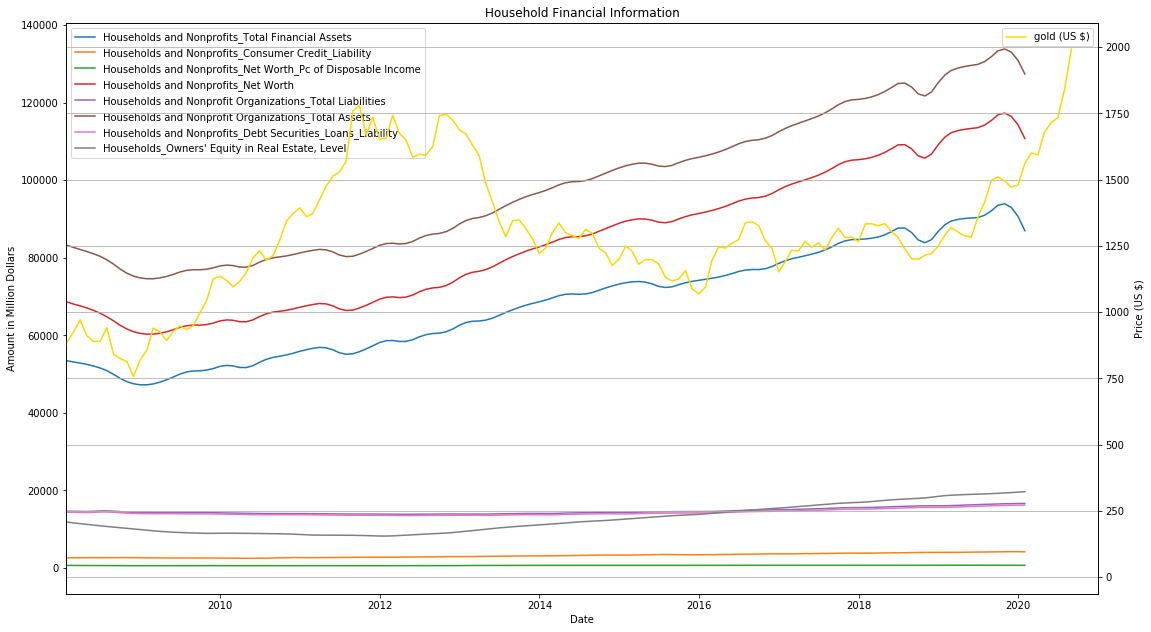

In [6]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

for i in house_list:
    ax1.plot(gold_df.index,
             gold_df[i], label=f"{i}")

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

plt.title('Household Financial Information')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount in Million Dollars')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

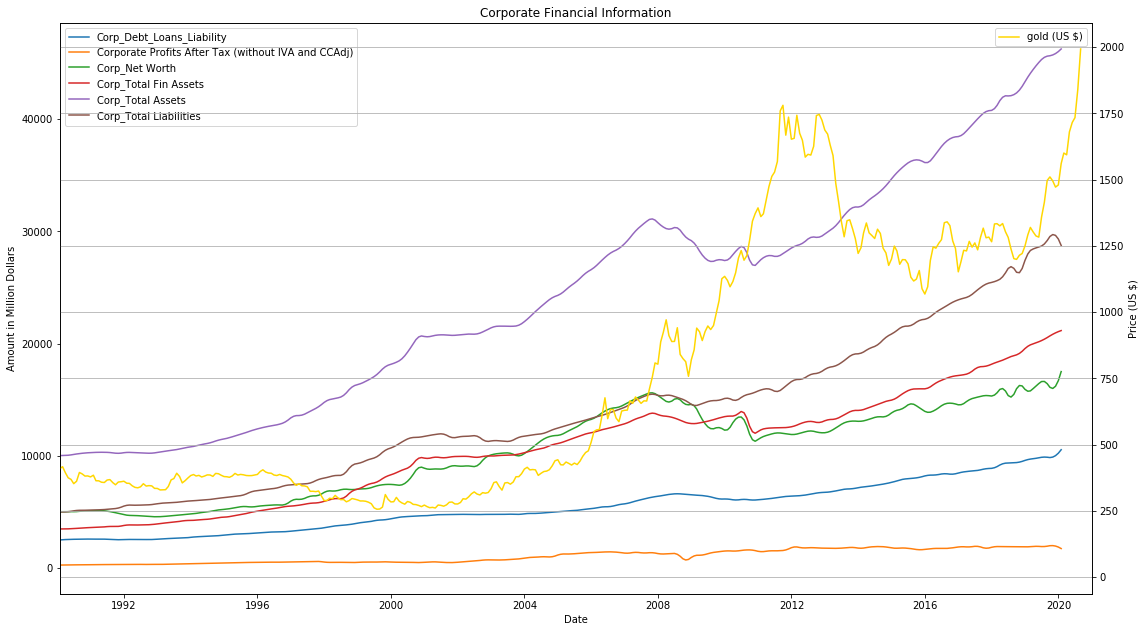

In [7]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

for i in corp_list:
    ax1.plot(gold_df.index,
             gold_df[i], label=f"{i}")

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

plt.title('Corporate Financial Information')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(1990, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount in Million Dollars')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

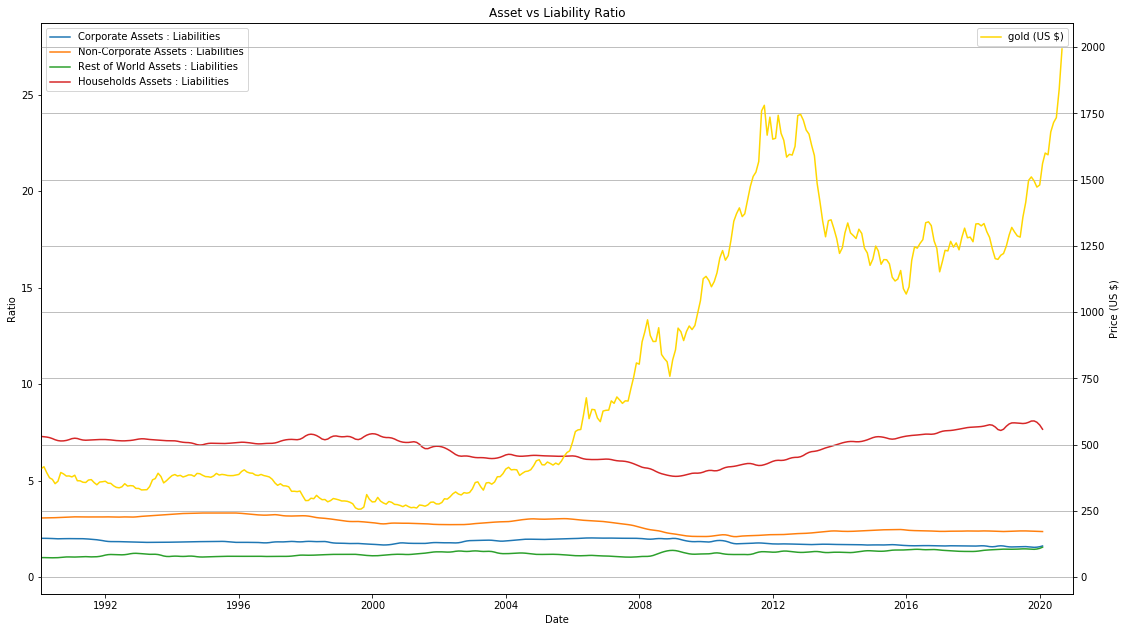

In [162]:
# Visualising the Linear Regression results.

fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, (gold_df['Corp_Total Assets'] / gold_df['Corp_Total Liabilities']), label='Corporate Assets : Liabilities')
ax1.plot(gold_df.index, (gold_df['Noncorp_Total Assets'] / gold_df['Noncorp_Total Liabilities']), label='Non-Corporate Assets : Liabilities')
ax1.plot(gold_df.index, (gold_df['Rest of the World_Total Financial Assets'] / gold_df['Rest of the World_Total Liabilities and Equity']), label='Rest of World Assets : Liabilities')
ax1.plot(gold_df.index, (gold_df['Households and Nonprofit Organizations_Total Assets'] / gold_df['Households and Nonprofit Organizations_Total Liabilities']), label='Households Assets : Liabilities')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#plt.ylim(0, 15)
plt.title('Asset vs Liability Ratio')
#ax1.ylabel('Ratio')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(1990, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Ratio')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

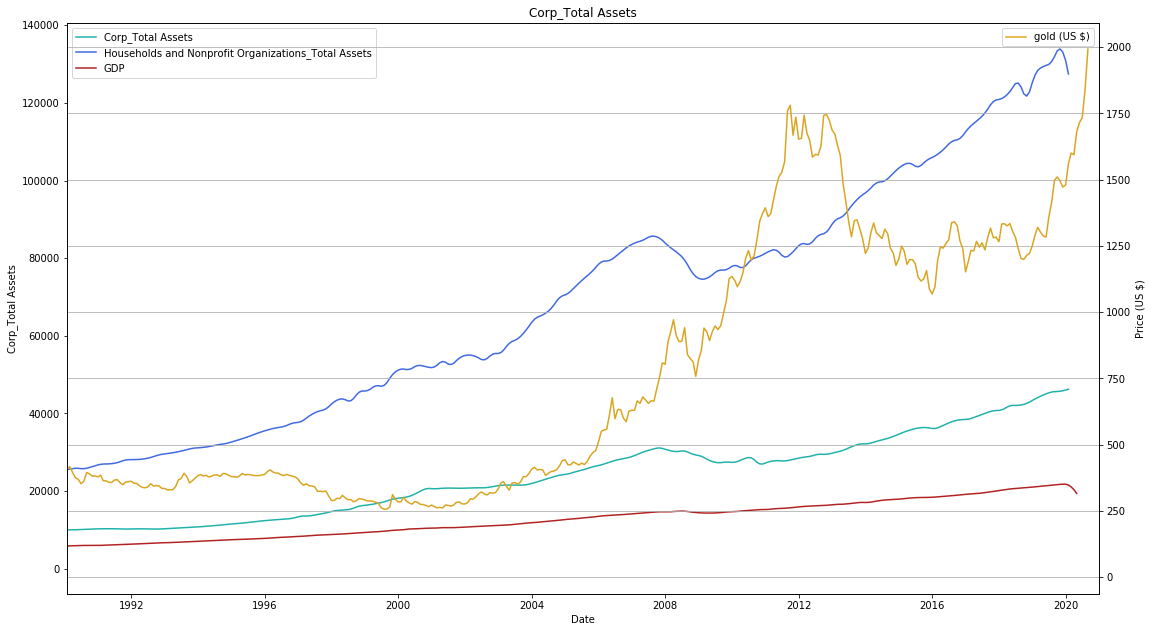

In [163]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'Corp_Total Assets'
k = 'Households and Nonprofit Organizations_Total Assets'
l = 'GDP'

ax1.plot(gold_df.index, gold_df[j], label=j, c='lightseagreen')
ax1.plot(gold_df.index, gold_df[k], label=k, c='royalblue')
ax1.plot(gold_df.index, gold_df[l], label=l, c='firebrick')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(1990, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

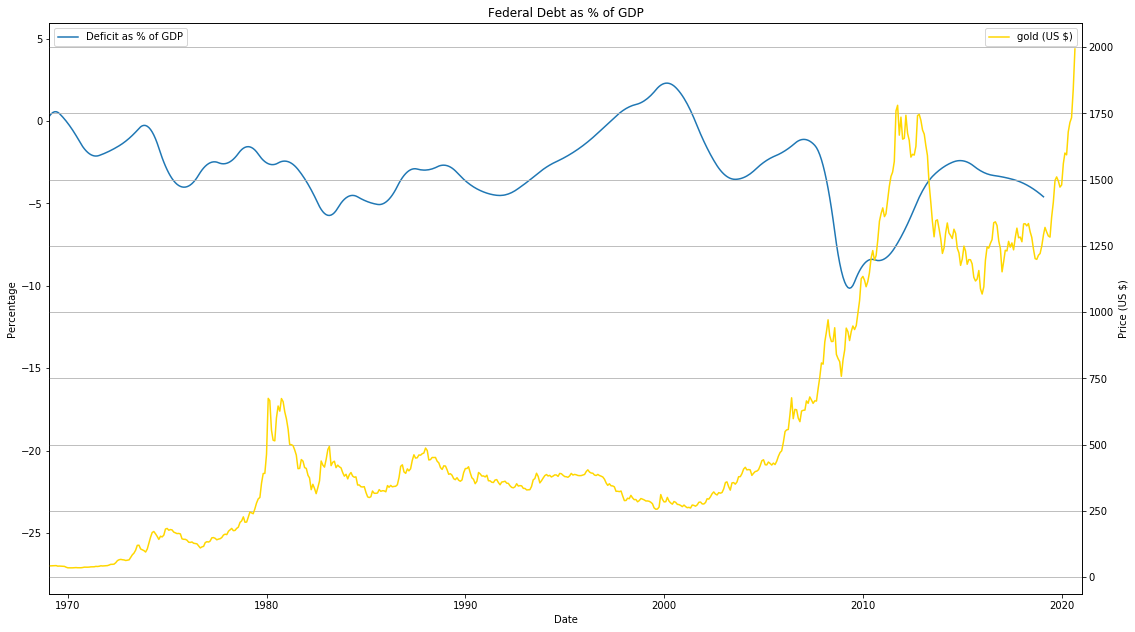

In [164]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, gold_df['Fed Surplus or Deficit as percent GDP'], label='Deficit as % of GDP')
#ax1.plot(gold_df.index, gold_df['Fed Debt_Total Public Debt as Perc of GDP'], label='Fed Dept as % of GDP')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')


#ax1.ylim(0, 15)
plt.title('Federal Debt as % of GDP')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(1969, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

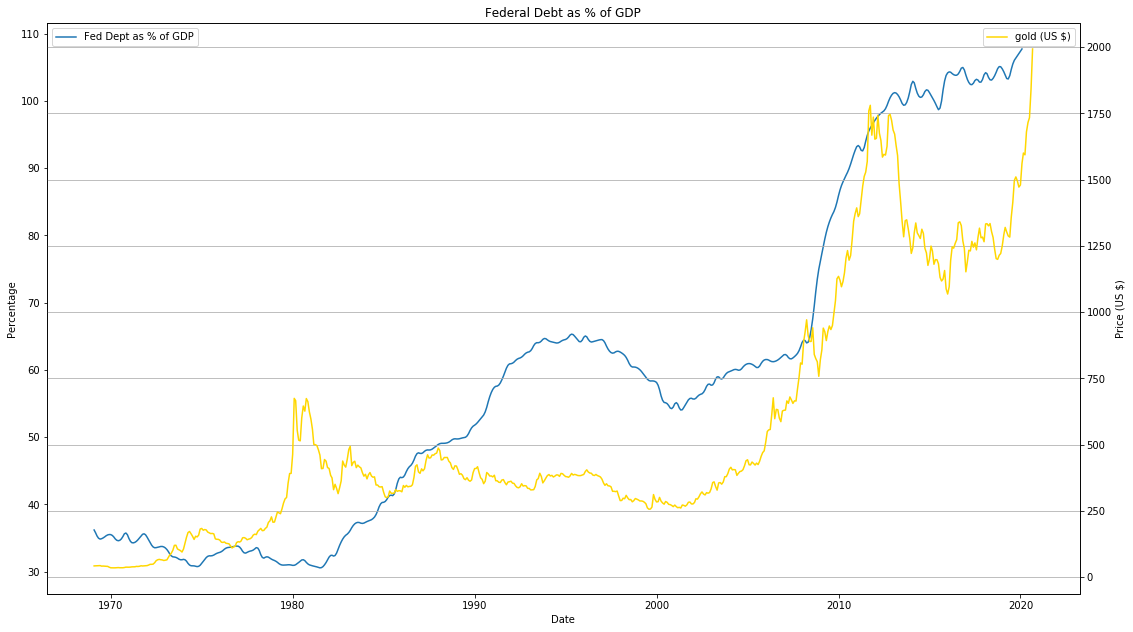

In [248]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

#ax1.plot(gold_df.index, gold_df['Fed Surplus or Deficit as percent GDP'], label='Deficit as % of GDP')
ax1.plot(gold_df.index, gold_df['Fed Debt_Total Public Debt as Perc of GDP'], label='Fed Dept as % of GDP')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title('Federal Debt as % of GDP')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

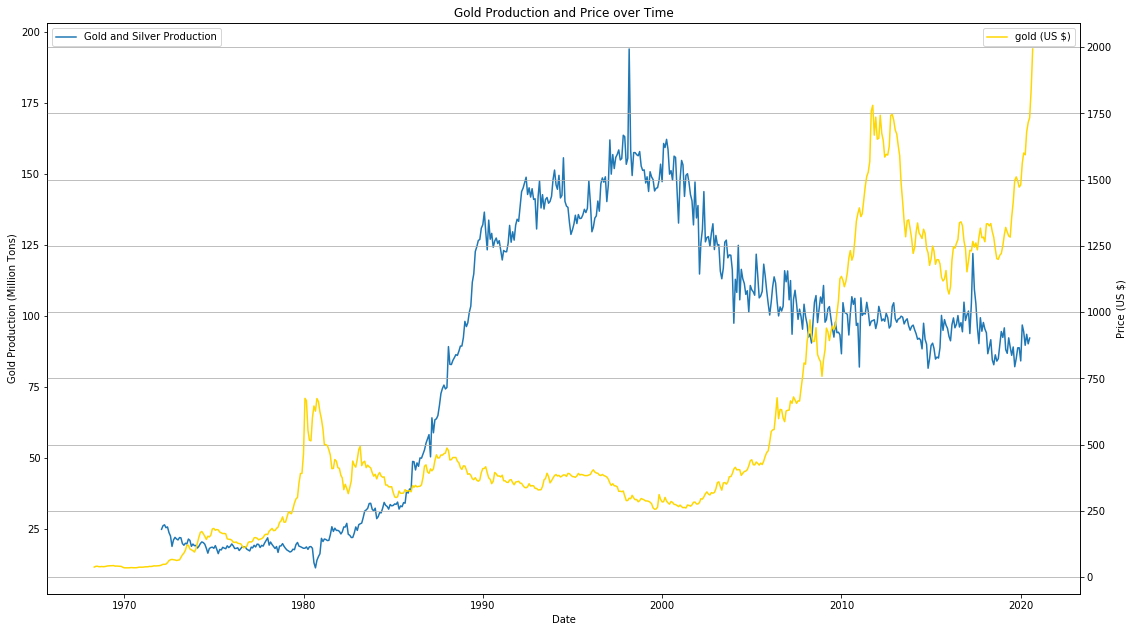

In [166]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, gold_df['IndustrialProductionGoldSilver21222S'], label='Gold and Silver Production')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title('Gold Production and Price over Time')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Production (Million Tons)')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

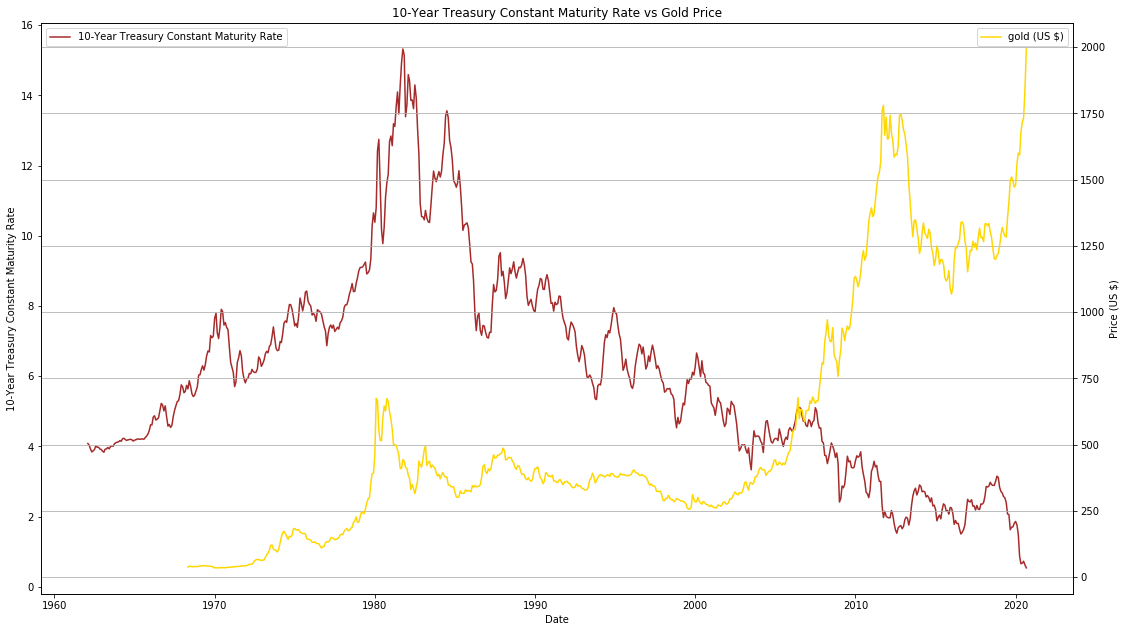

In [167]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, gold_df['10-Year Treasury Constant Maturity Rate'], label='10-Year Treasury Constant Maturity Rate', c='brown')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title('10-Year Treasury Constant Maturity Rate vs Gold Price')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)


ax1.set_xlabel('Date')
ax1.set_ylabel('10-Year Treasury Constant Maturity Rate')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

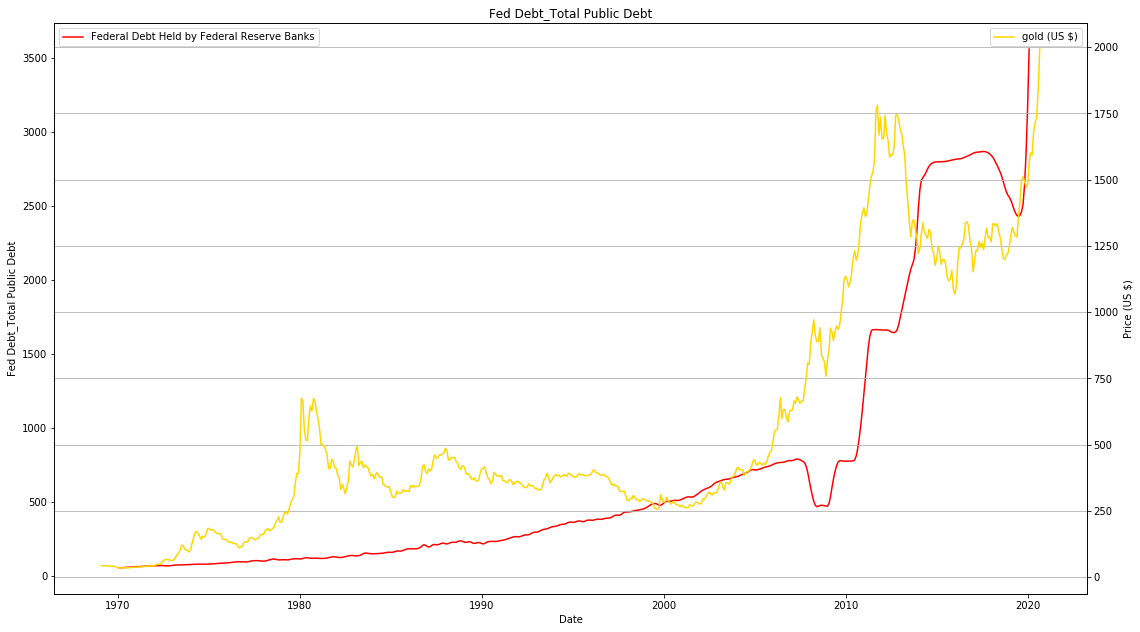

In [249]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, gold_df['Federal Debt Held by Federal Reserve Banks'], label='Federal Debt Held by Federal Reserve Banks', c='red')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title('Fed Debt_Total Public Debt')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Fed Debt_Total Public Debt')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

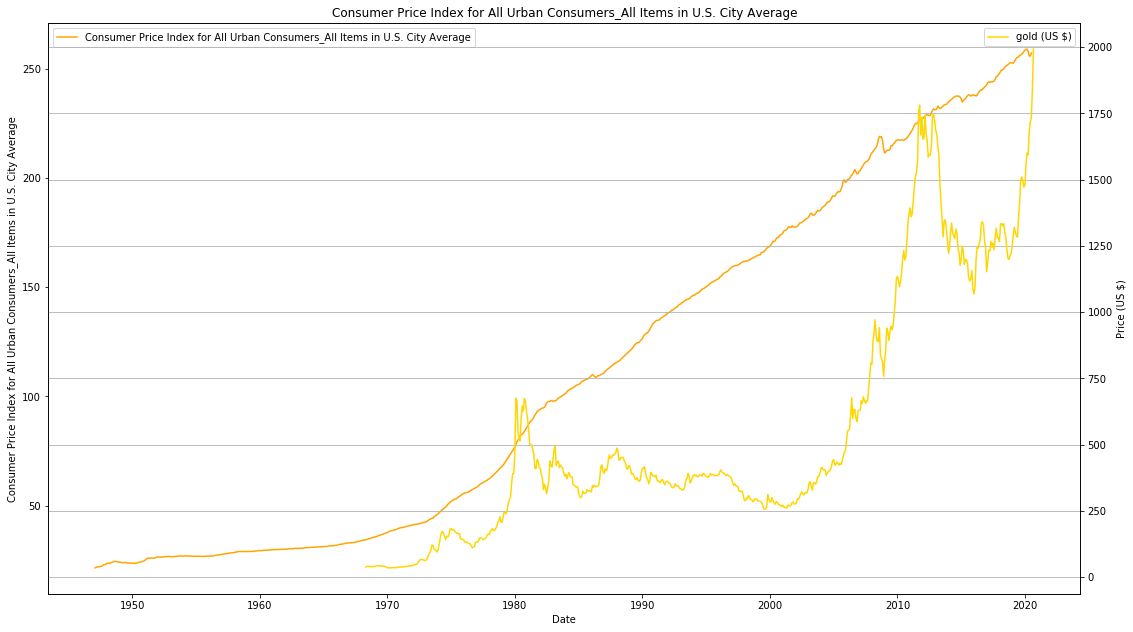

In [169]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, gold_df['Consumer Price Index for All Urban Consumers_All Items in US City Average'], label='Consumer Price Index for All Urban Consumers_All Items in U.S. City Average', c='orange')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title('Consumer Price Index for All Urban Consumers_All Items in U.S. City Average')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Consumer Price Index for All Urban Consumers_All Items in U.S. City Average')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

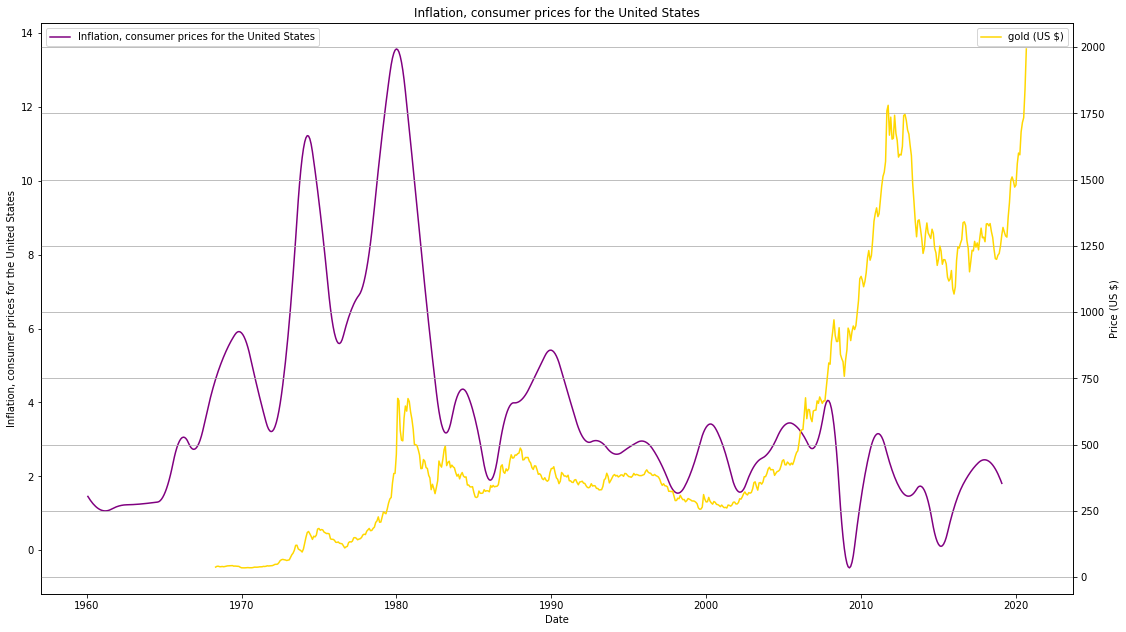

In [170]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()

ax1.plot(gold_df.index, gold_df['Inflation, consumer prices for the United States'], label='Inflation, consumer prices for the United States', c='purple')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='gold')

#ax1.ylim(0, 15)
plt.title('Inflation, consumer prices for the United States')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

#ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation, consumer prices for the United States')
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

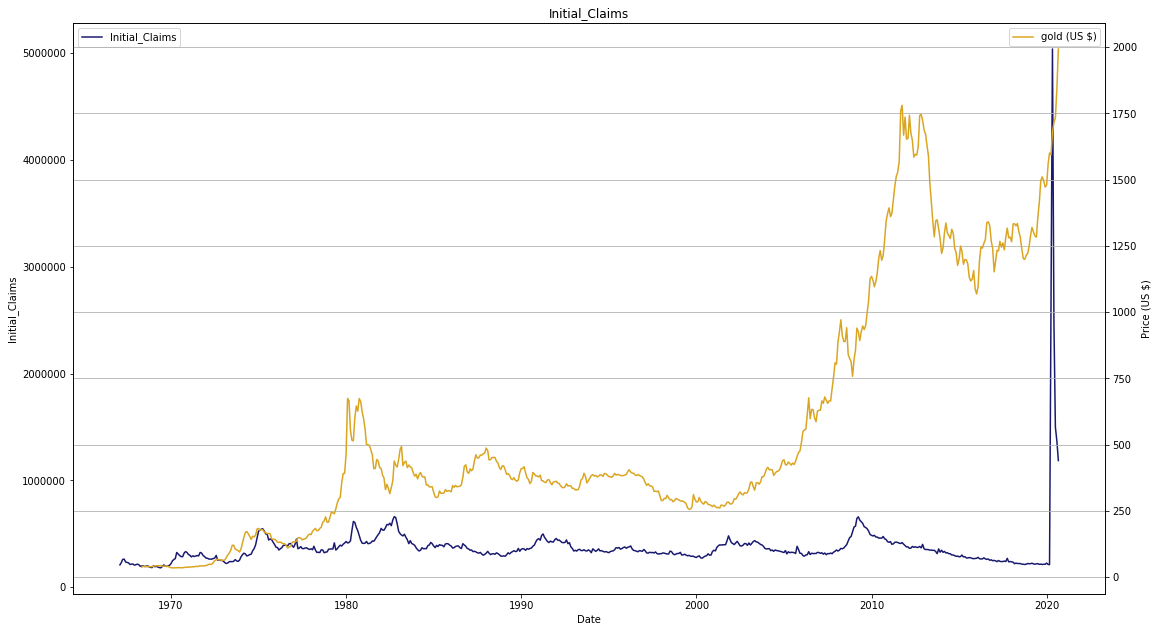

In [171]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'Initial_Claims'
ax1.plot(gold_df.index, gold_df[j], label=j, c='midnightblue')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

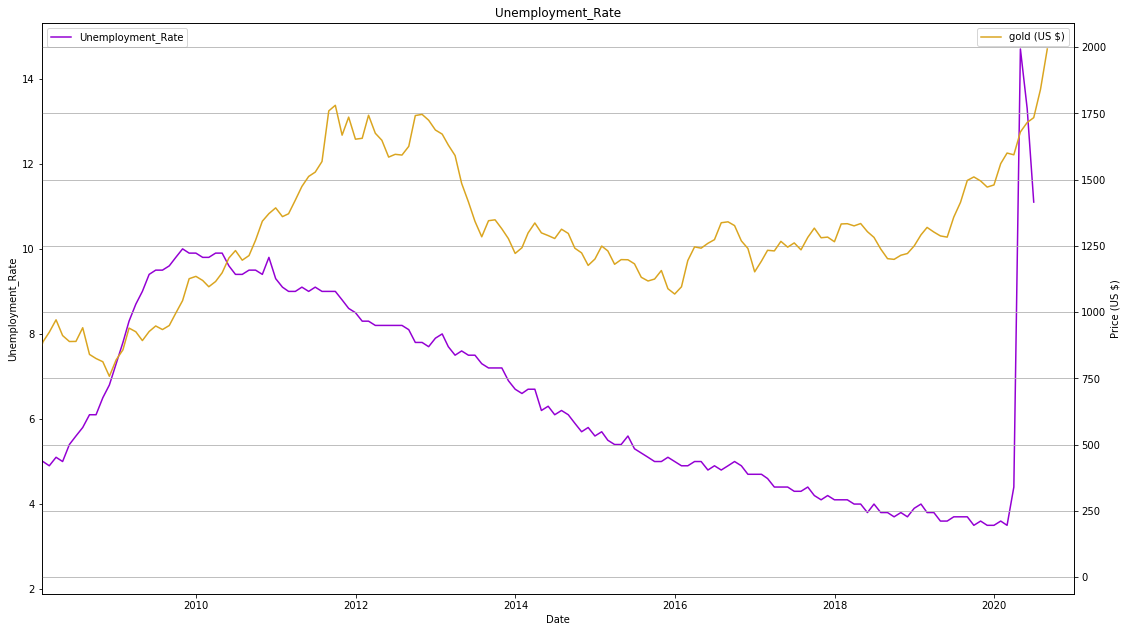

In [172]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'Unemployment_Rate'
ax1.plot(gold_df.index, gold_df[j], label=j, c='darkviolet')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

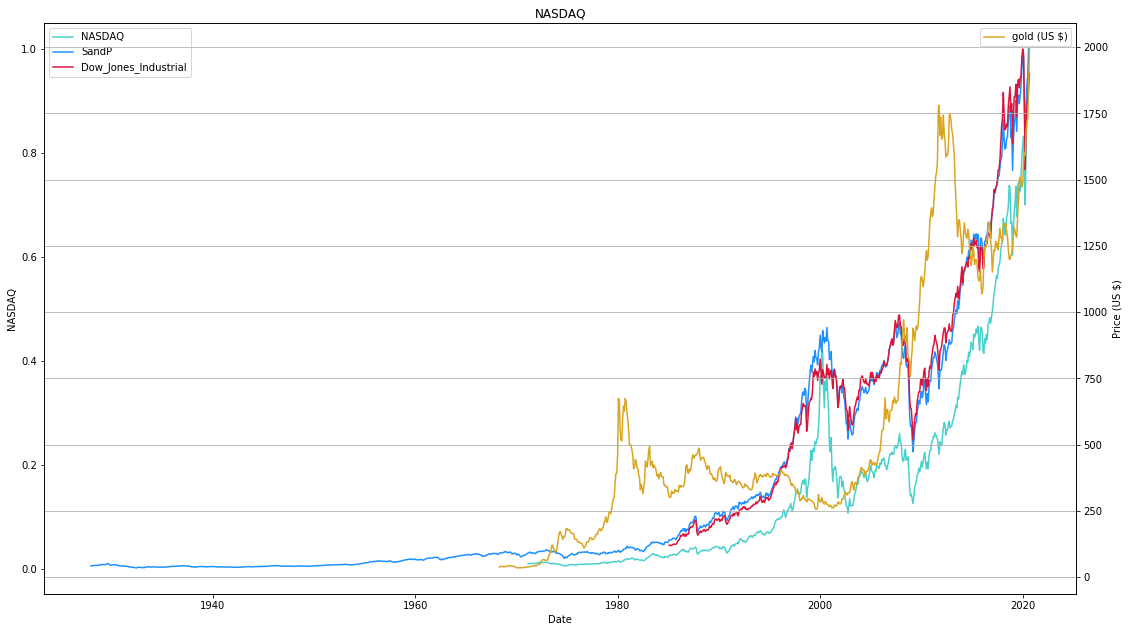

In [173]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'NASDAQ'
k = 'SandP'
l = 'Dow_Jones_Industrial'

ax1.plot(gold_df.index, (gold_df[j] / gold_df[j].max()), label=j, c='mediumturquoise')
ax1.plot(gold_df.index, (gold_df[k] / gold_df[k].max()), label=k, c='dodgerblue')
ax1.plot(gold_df.index, (gold_df[l] / gold_df[l].max()), label=l, c='crimson')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

In [174]:
j = 'NASDAQ'
k = 'SandP'
l = 'Dow_Jones_Industrial'
gold_df['market_average'] = gold_df[[j, k, l]].mean(axis=1)

Text(0, 0.5, 'Price (US $)')

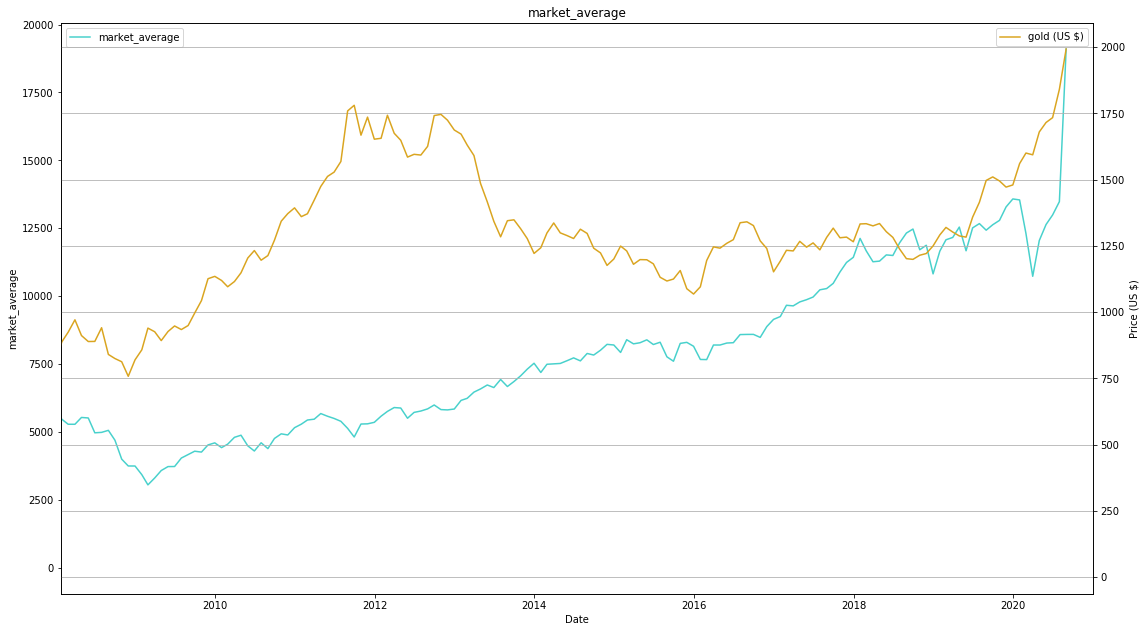

In [175]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'market_average'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')


ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

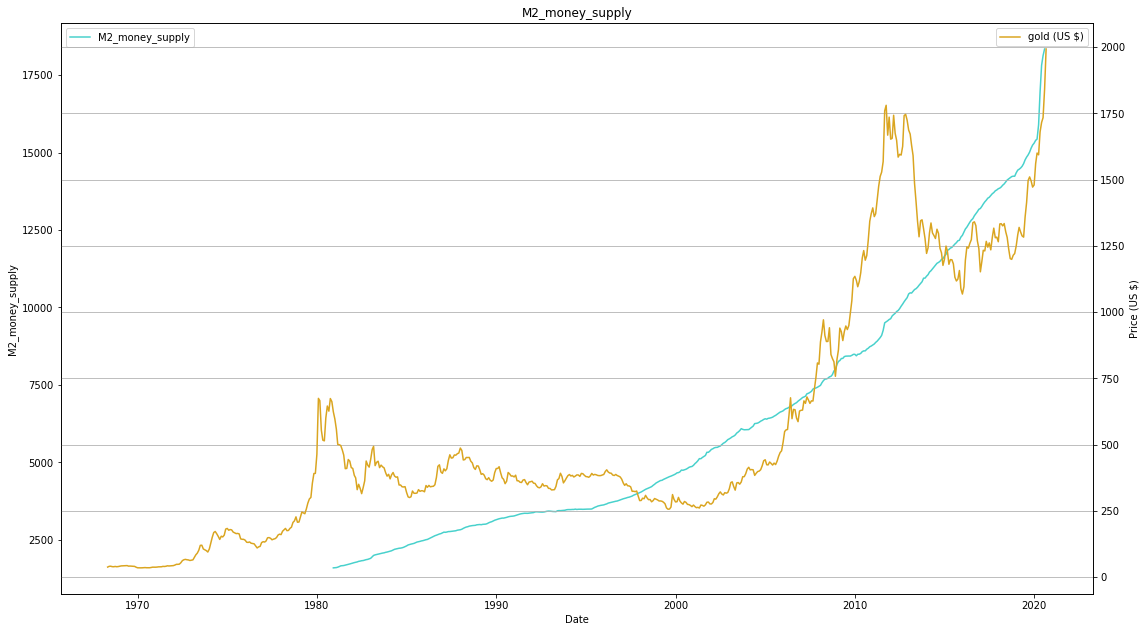

In [176]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'M2_money_supply'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

#ax1.set_xlim([datetime.date(2008, 1, 26), datetime.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

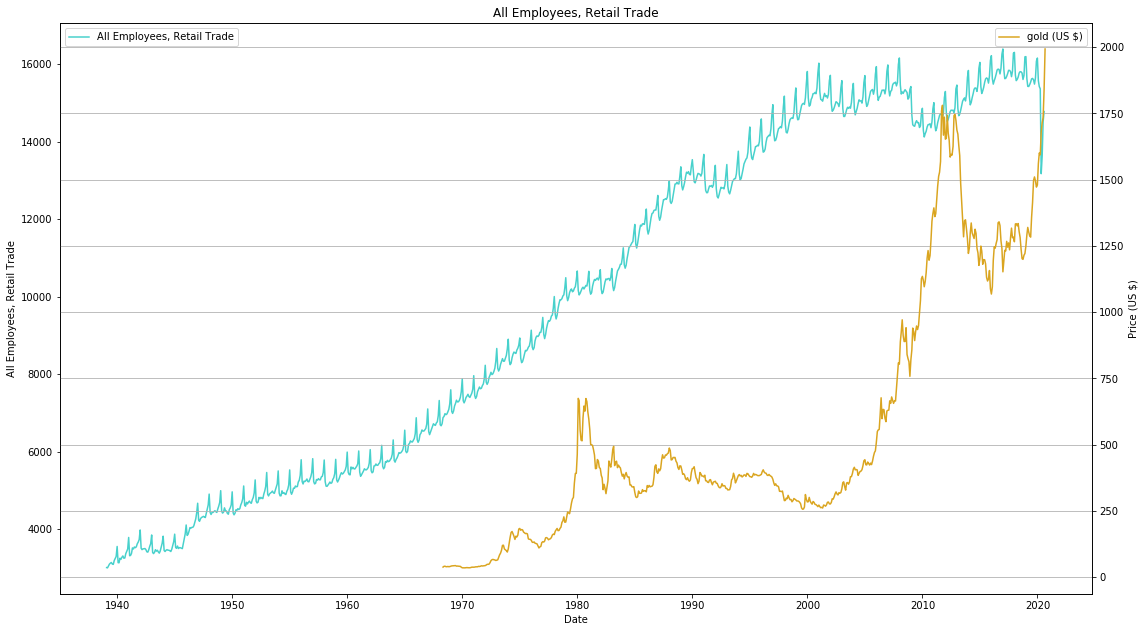

In [177]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'All Employees, Retail Trade'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

#ax1.set_xlim([datetime.date(2008, 1, 26), datetime.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

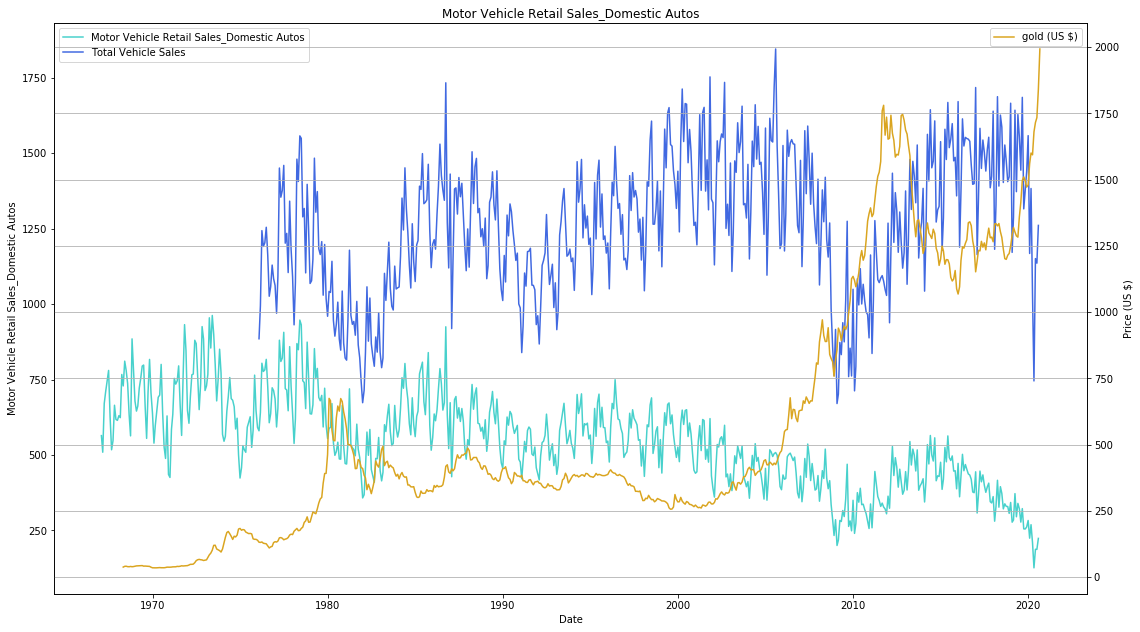

In [178]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'Motor Vehicle Retail Sales_Domestic Autos'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')
ax1.plot(gold_df.index, gold_df['Total Vehicle Sales'], label='Total Vehicle Sales', c='royalblue')

ax2 = ax1.twinx()
ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

#ax1.set_xlim([datetime.date(2008, 1, 26), datetime.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

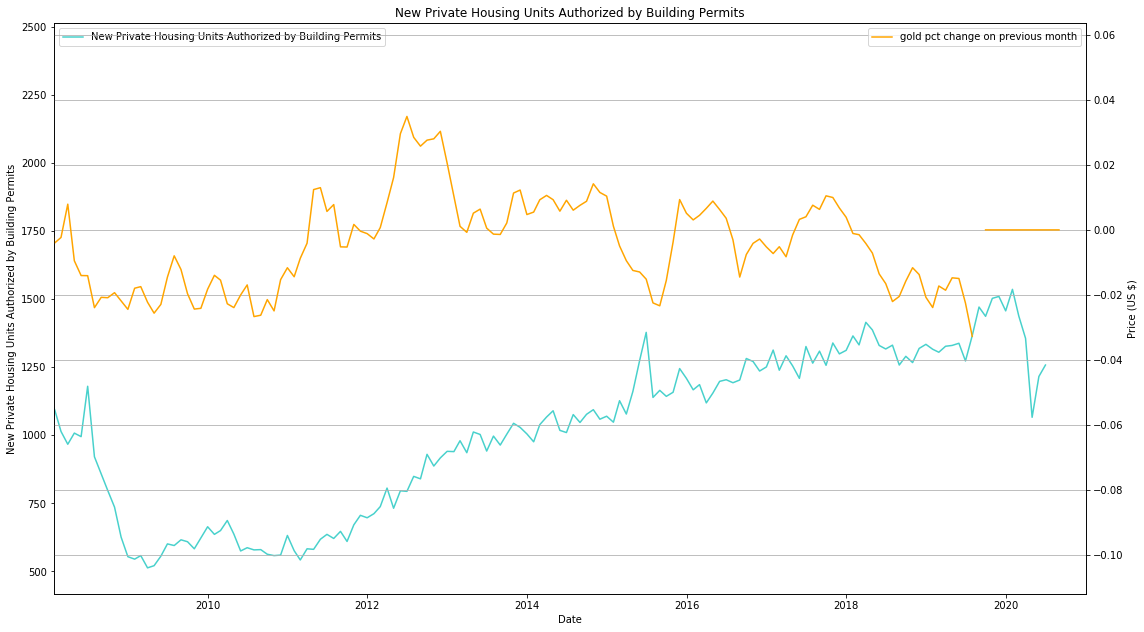

In [179]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'New Private Housing Units Authorized by Building Permits'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')

ax2 = ax1.twinx()
#ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')
#ax2.plot(gold_df.index, gold_df['GOLD_shift'], label='gold (US $)', c='goldenrod')
ax2.plot(gold_df.index, gold_df['Gold-T+1'], label='gold pct change on previous month', c='orange')


#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

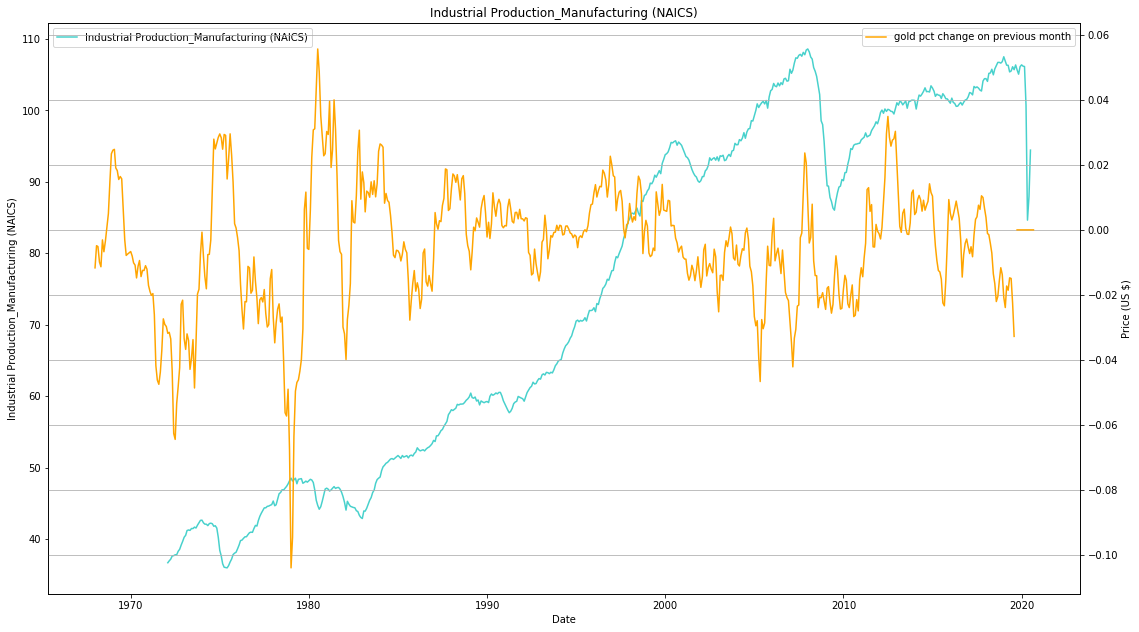

In [181]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'Industrial Production_Manufacturing (NAICS)'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')

ax2 = ax1.twinx()
#ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')
#ax2.plot(gold_df.index, gold_df['GOLD_shift'], label='gold shifted (US $)', c='gold')
ax2.plot(gold_df.index, gold_df['Gold-T+1'], label='gold pct change on previous month', c='orange')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

#ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

Text(0, 0.5, 'Price (US $)')

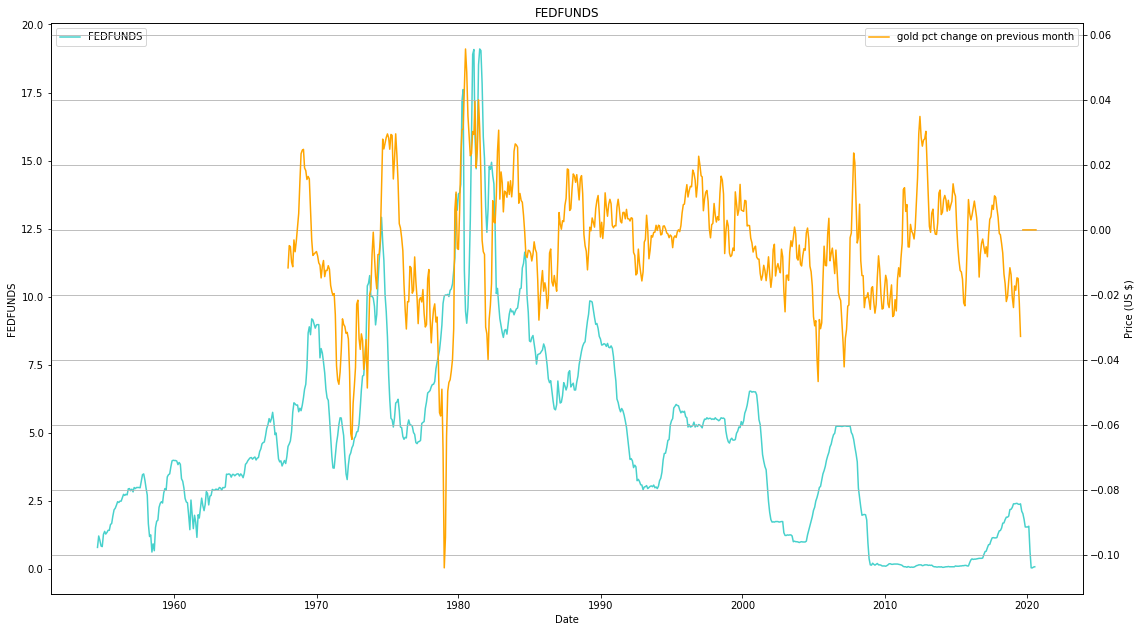

In [182]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'FEDFUNDS'

ax1.plot(gold_df.index, gold_df[j], label=j, c='mediumturquoise')

ax2 = ax1.twinx()
#ax2.plot(gold_df.index, gold_df['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')
#ax2.plot(gold_df.index, gold_df['GOLD_shift'], label='gold shifted (US $)', c='gold')
ax2.plot(gold_df.index, gold_df['Gold-T+1'], label='gold pct change on previous month', c='orange')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

#ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2021, 1, 1)])
ax1.set_xlabel('Date')
ax1.set_ylabel(j)
ax2.set_ylabel('Price (US $)')

In [6]:
min_date = '1969-01-01'

In [7]:
# Eliminate data before the 'min_date' which is when the gold data begins
gold_df = gold_df.loc[gold_df.index > min_date]

In [8]:
# Check if the folder 'data_export' exists and if not create it.
folder_create = os.path.exists(os.path.join(os.getcwd(), "data_export"))
if folder_create is False:
    os.mkdir(os.path.join(os.getcwd(), "data_export"))
# Export the polished dataframe to re-import after modelling.
gold_df.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df.csv"))

In [9]:
leading_list = [gold_col, 'Industrial Production_Manufacturing (NAICS)', 'All Employees, Retail Trade', 'Unemployment_Rate', 'IndustrialProductionGoldSilver21222S', 'Federal Debt Held by Federal Reserve Banks', 'FEDFUNDS', 'Fed Debt_Total Public Debt as Perc of GDP', 'Households and Nonprofit Organizations_Total Assets', 'Total Vehicle Sales', 'New Private Housing Units Authorized by Building Permits', 'Corp_Total Assets']
# 
leading_list

['GOLDAMGBDollarD228NLBM',
 'Industrial Production_Manufacturing (NAICS)',
 'All Employees, Retail Trade',
 'Unemployment_Rate',
 'IndustrialProductionGoldSilver21222S',
 'Federal Debt Held by Federal Reserve Banks',
 'FEDFUNDS',
 'Fed Debt_Total Public Debt as Perc of GDP',
 'Households and Nonprofit Organizations_Total Assets',
 'Total Vehicle Sales',
 'New Private Housing Units Authorized by Building Permits',
 'Corp_Total Assets']

In [10]:
# Filter the dataframe and keep only the columns listed.
#gold_df = gold_df.filter(columns_keep, axis=1)
gold_df = gold_df.filter(leading_list, axis=1)

In [11]:
data_path = os.path.join(os.getcwd(), "data")
# Check if the 'data' folder exists, if not create it
folder_create = os.path.exists(data_path)
if folder_create is False:
    os.mkdir(data_path)
    # Create 'train' and 'test' folders if the data folder does not exist.
    os.mkdir(os.path.join(data_path, "train"))
    os.mkdir(os.path.join(data_path, "test"))
# Export the polished dataframe to re-import after modelling.
gold_df.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df.csv"))

In [12]:
"""The following code is used for making crude extapolation assumptions for economic indicators"""

'The following code is used for making crude extapolation assumptions for economic indicators'

In [13]:
## Extend the dataframe to 2024.
gold_df_fit = gold_df.loc[(gold_df.index > min_date) & (gold_df.index < '2024-01-01')]

idx = pd.date_range(start=dt.date(2020, 8, 31), end=dt.date(2024, 8, 31), freq='M')

gold_df_fit1 = gold_df_fit.copy().reindex(idx)

gold_df_fit = gold_df_fit.append(gold_df_fit1).reset_index()

gold_df_fit['index'] = pd.to_datetime(gold_df_fit['index'])
gold_df_fit.index = gold_df_fit['index']
gold_df_fit.drop(['index'], axis=1, inplace=True)

In [14]:
# Create a dataframe based on the recovery from the last recession and for the recovery from the covid recession.
pre_df = gold_df_fit.loc[(gold_df_fit.index >= '2009-06-01') & (gold_df_fit.index <= '2013-06-30')].copy()
post_df = gold_df_fit.loc[(gold_df_fit.index >= '2020-08-31') & (gold_df_fit.index < '2024-08-31')].copy()

In [15]:
# Use post 2009 crash data, bulk shift and add to the current data for 2020.
extrapolate_list = ['Industrial Production_Manufacturing (NAICS)', 'All Employees, Retail Trade', 'Households and Nonprofit Organizations_Total Assets', 'New Private Housing Units Authorized by Building Permits', 'Corp_Total Assets', 'Total Vehicle Sales']
# 'New Private Housing Units Authorized by Building Permits', 'Total Vehicle Sales',
# Loop over these attributes so that the 'post_df' contains the data from the 09' recovery but with a bulk shift to fix onto the 2020 recovery.
for i in extrapolate_list:
    
    use_col = i

    fit_min = '2020-01-01'
    fit_max = '2020-08-31'

    minimum = (gold_df_fit[use_col].loc[(gold_df_fit[use_col].index >= fit_min) & (gold_df_fit[use_col].index <= fit_max)].max()) - pre_df[use_col].quantile(0.7)
    # Adding the value 'minimum' essentially ensures the scale works properly
    pre_df[use_col] = pre_df[use_col].add(minimum)

    post_df[use_col] = pre_df[use_col].values

In [16]:
# Create a dataframe based on the recovery from the last recession and for the recovery from the covid recession for employment.
pre_df1 = gold_df_fit.loc[(gold_df_fit.index >= '2010-11-30') & (gold_df_fit.index <= '2014-11-30')].copy()
post_df1 = gold_df_fit.loc[(gold_df_fit.index >= '2020-08-31') & (gold_df_fit.index < '2024-08-31')].copy()

use_col = 'Unemployment_Rate'
fit_min = '2020-04-01'
fit_max = '2020-08-31'

minimum = (gold_df_fit[use_col].loc[(gold_df_fit[use_col].index >= fit_min) & (gold_df_fit[use_col].index <= fit_max)].min()) - pre_df1[use_col].max()
# Adding the value 'minimum' essentially ensures the scale works properly
pre_df1[use_col] = pre_df1[use_col].add(minimum)
post_df1[use_col] = pre_df1[use_col].values

In [17]:
# recreate the gold_df_fit but with the recovery estimate curves
gold_df_fit = gold_df.loc[(gold_df.index > min_date) & (gold_df.index < '2024-01-01')]

idx = pd.date_range(start=dt.date(2020, 8, 31), end=dt.date(2024, 8, 31), freq='M')

gold_df_fit1 = gold_df_fit.copy().reindex(idx)


for i in extrapolate_list:
    #gold_df_fit1 = replace_values(gold_df_fit, 'Industrial Production_Manufacturing (NAICS)')
    del gold_df_fit1[i]
    gold_df_fit1 = gold_df_fit1.merge(post_df[i], left_index=True, right_index=True, how='left')
del gold_df_fit1['Unemployment_Rate']
gold_df_fit1 = gold_df_fit1.merge(post_df1['Unemployment_Rate'], left_index=True, right_index=True, how='left')

gold_df_fit = gold_df_fit.append(gold_df_fit1).reset_index()

gold_df_fit['index'] = pd.to_datetime(gold_df_fit['index'])
gold_df_fit.index = gold_df_fit['index']
gold_df_fit.drop(['index'], axis=1, inplace=True)

In [18]:
gold_df_fit.iloc[-1, gold_df_fit.columns.get_loc('FEDFUNDS')] = 0
itf = []
for i in list(range(1, 48, 1)):
    itf.append((-0.00002*i**4) + (0.0015*(i**3)) - (0.0379*i**2) + (0.161*i) + (144.81))
for i, j in zip(list(range(-1, -48, -1)), itf):
    gold_df_fit.iloc[i, gold_df_fit.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = j
gold_df_fit.iloc[-1, gold_df_fit.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 4800
gold_df_fit.iloc[-36, gold_df_fit.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 4200

In [19]:
# Interpolate for the null values
for i in leading_list[1:]:
    gold_df_fit[i] = gold_df_fit[i].interpolate(method='linear', limit_direction='both')
gold_df_fit = gold_df_fit.resample("M").mean()

In [20]:
for i in gold_df_fit.columns:
    frac_null = gold_df_fit[i].isna().sum() /len(gold_df_fit)
    print(i, ':', frac_null)

GOLDAMGBDollarD228NLBM : 0.0718562874251497
Industrial Production_Manufacturing (NAICS) : 0.0
All Employees, Retail Trade : 0.0
Unemployment_Rate : 0.0
IndustrialProductionGoldSilver21222S : 0.0
Federal Debt Held by Federal Reserve Banks : 0.0
FEDFUNDS : 0.0
Fed Debt_Total Public Debt as Perc of GDP : 0.0
Households and Nonprofit Organizations_Total Assets : 0.0
Total Vehicle Sales : 0.0
New Private Housing Units Authorized by Building Permits : 0.0
Corp_Total Assets : 0.0


In [21]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 28,
         'axes.labelsize': 32,
         'axes.titlesize': 36,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}
plt.rcParams.update(params)

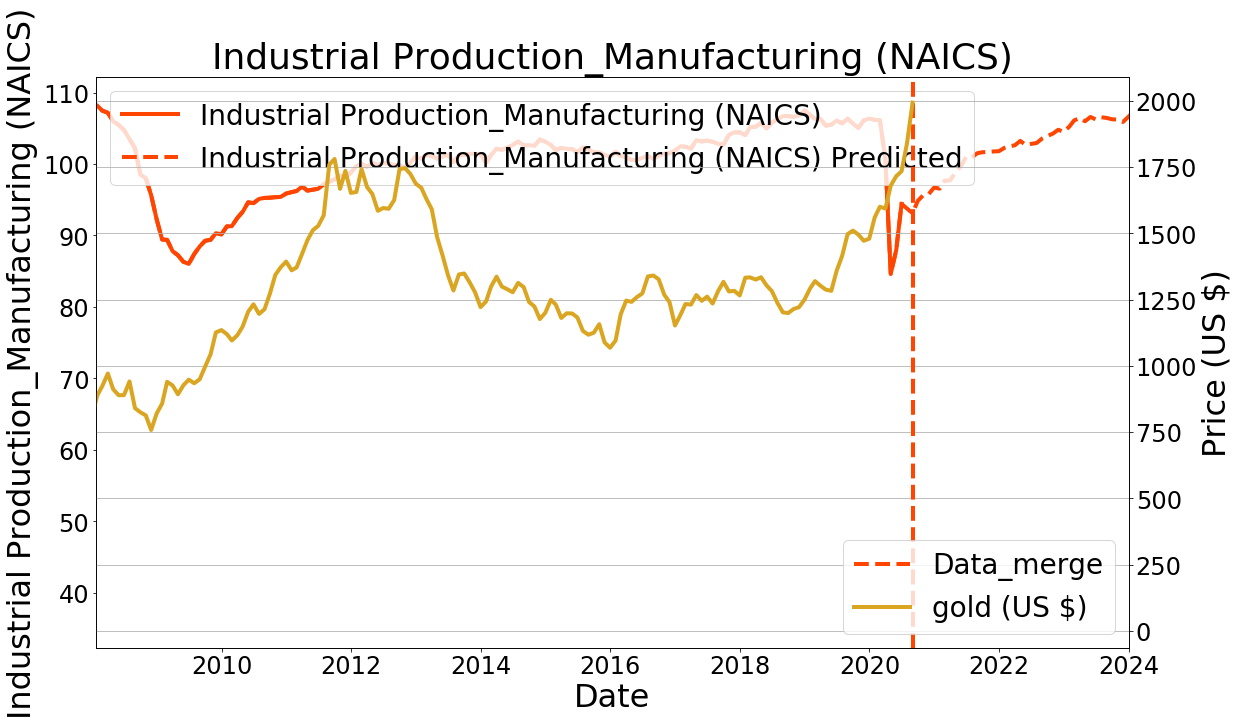

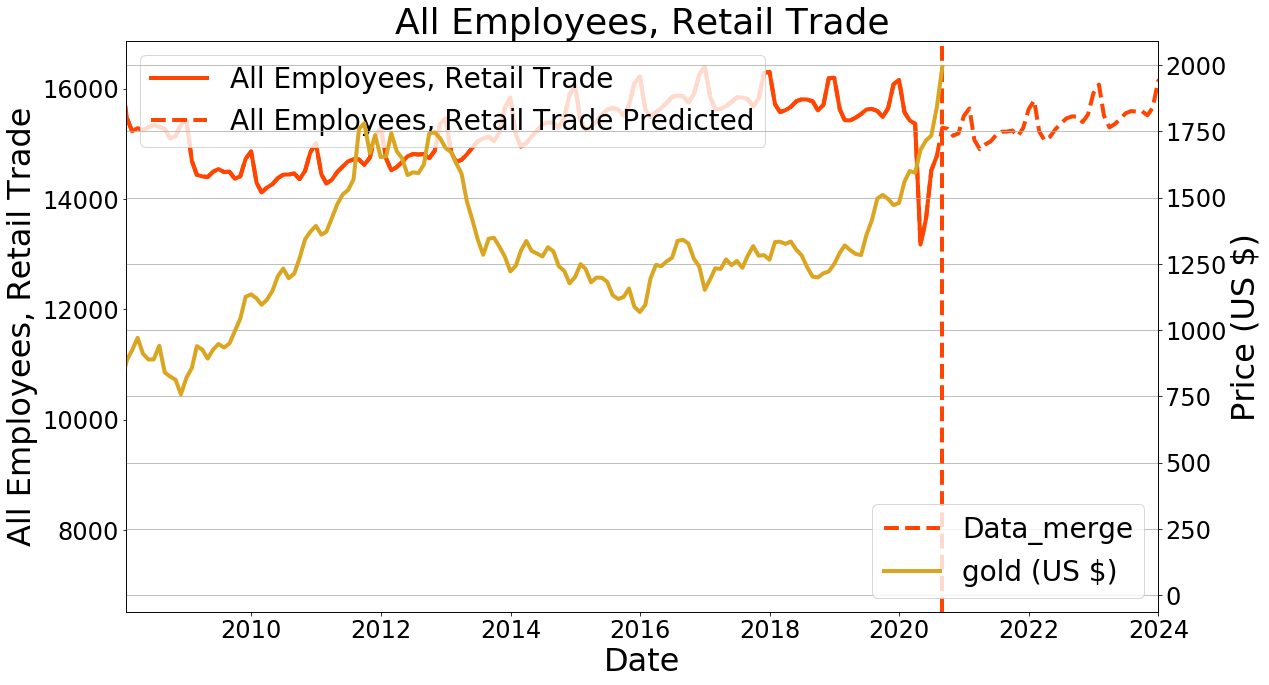

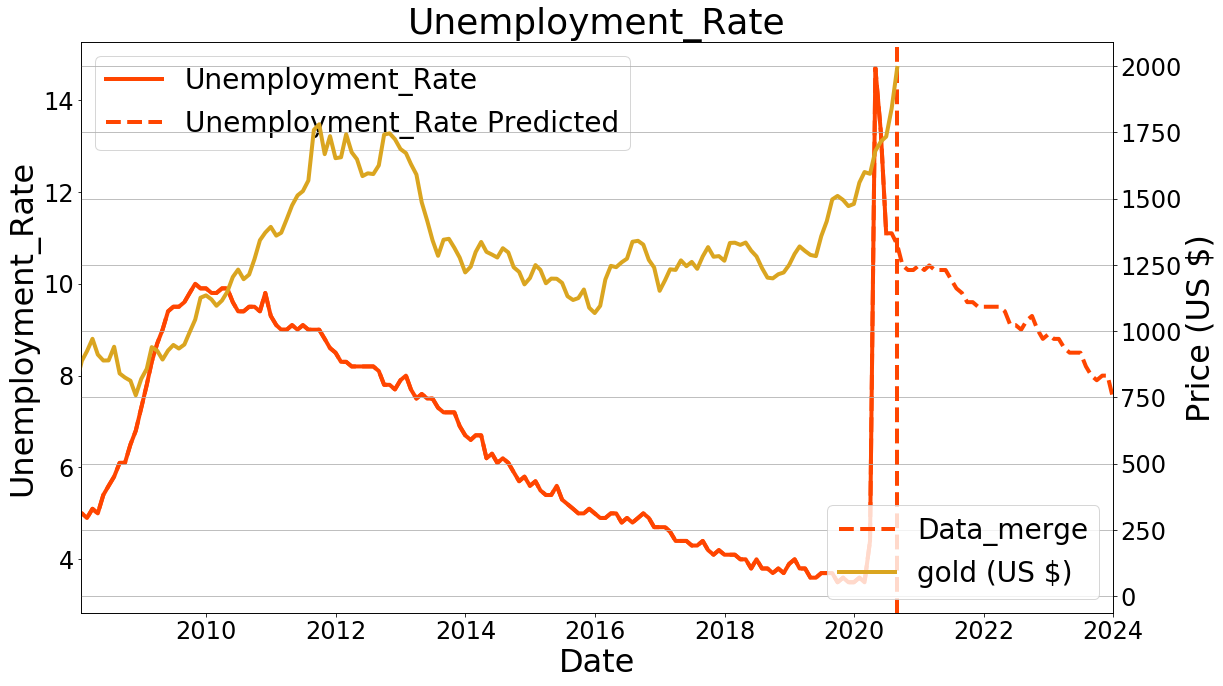

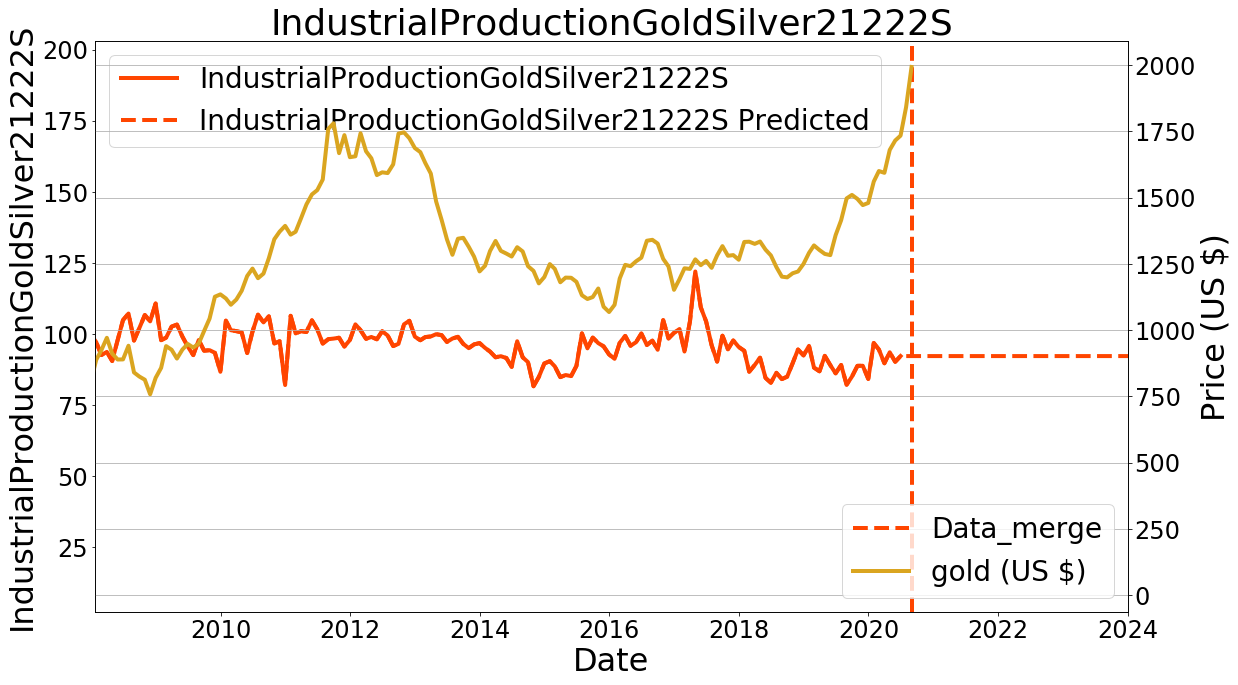

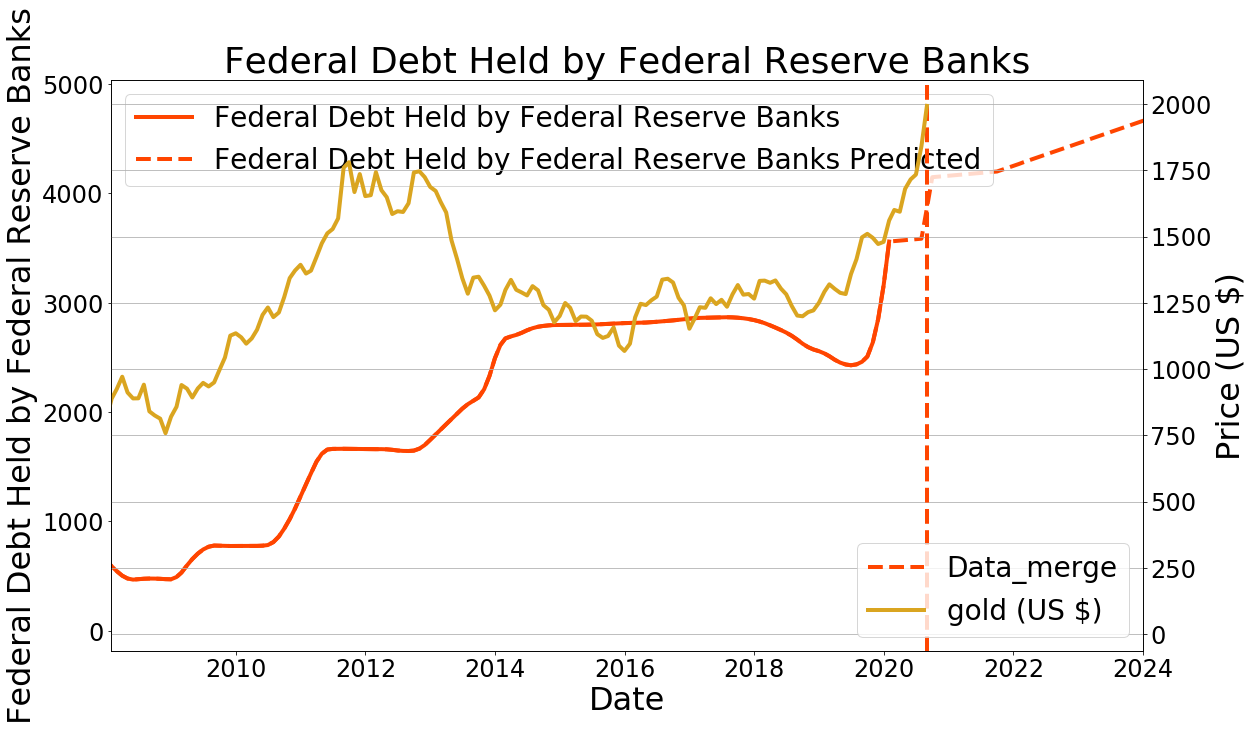

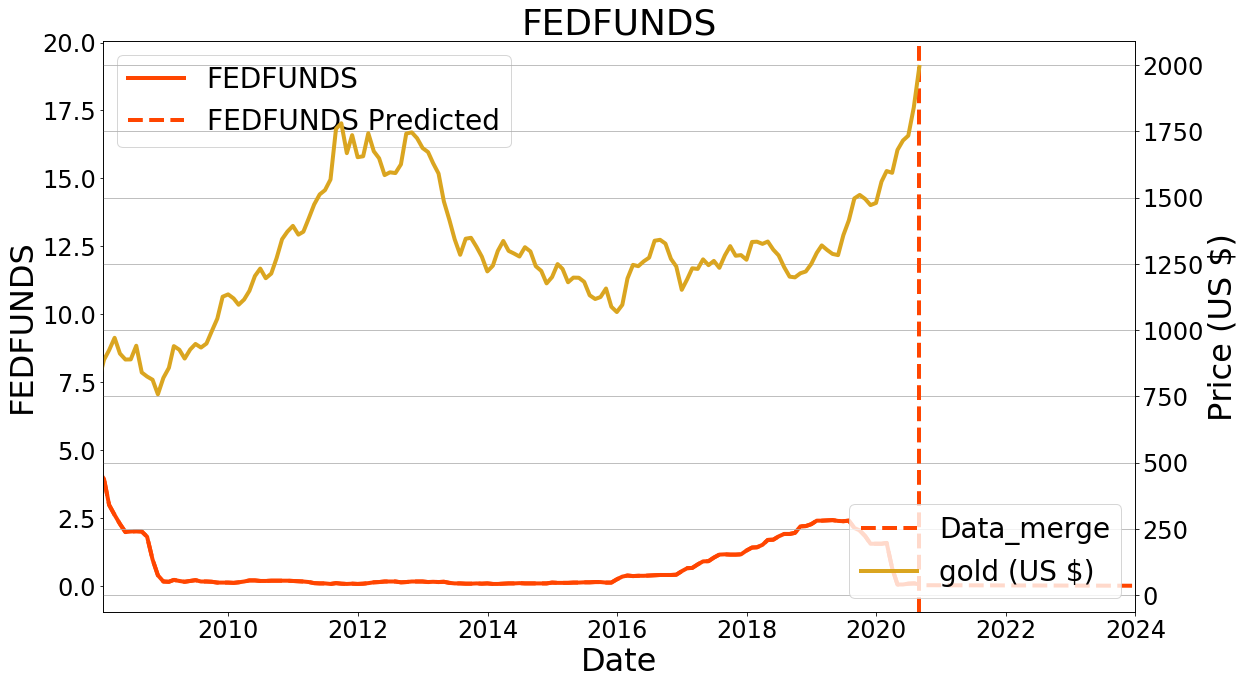

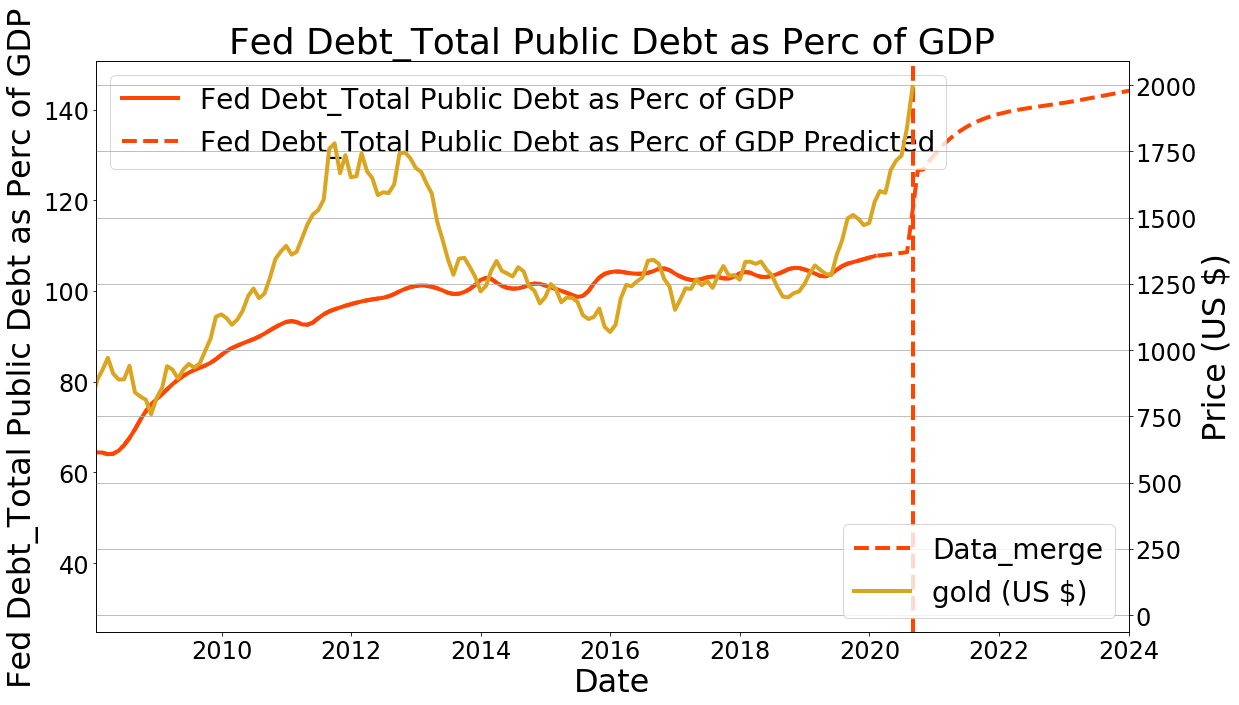

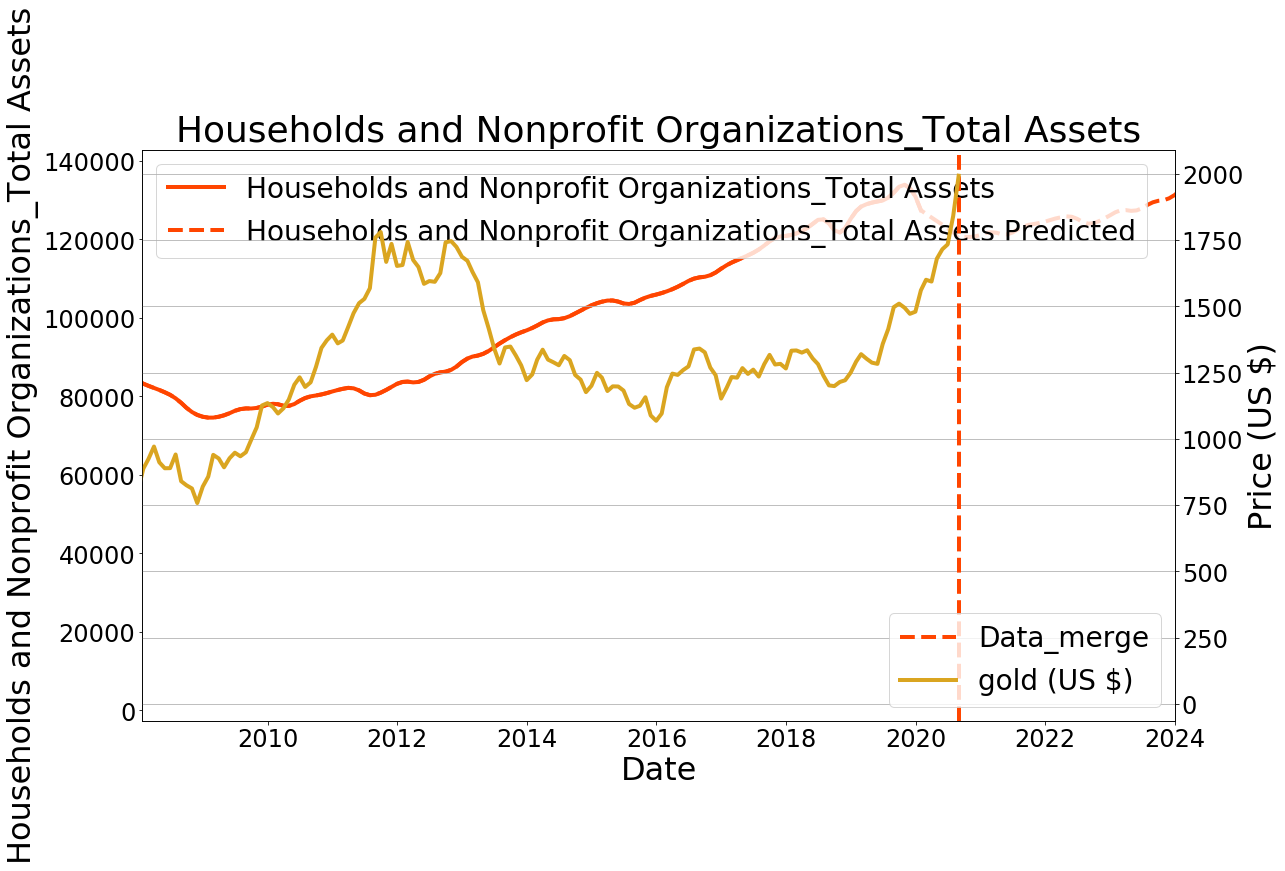

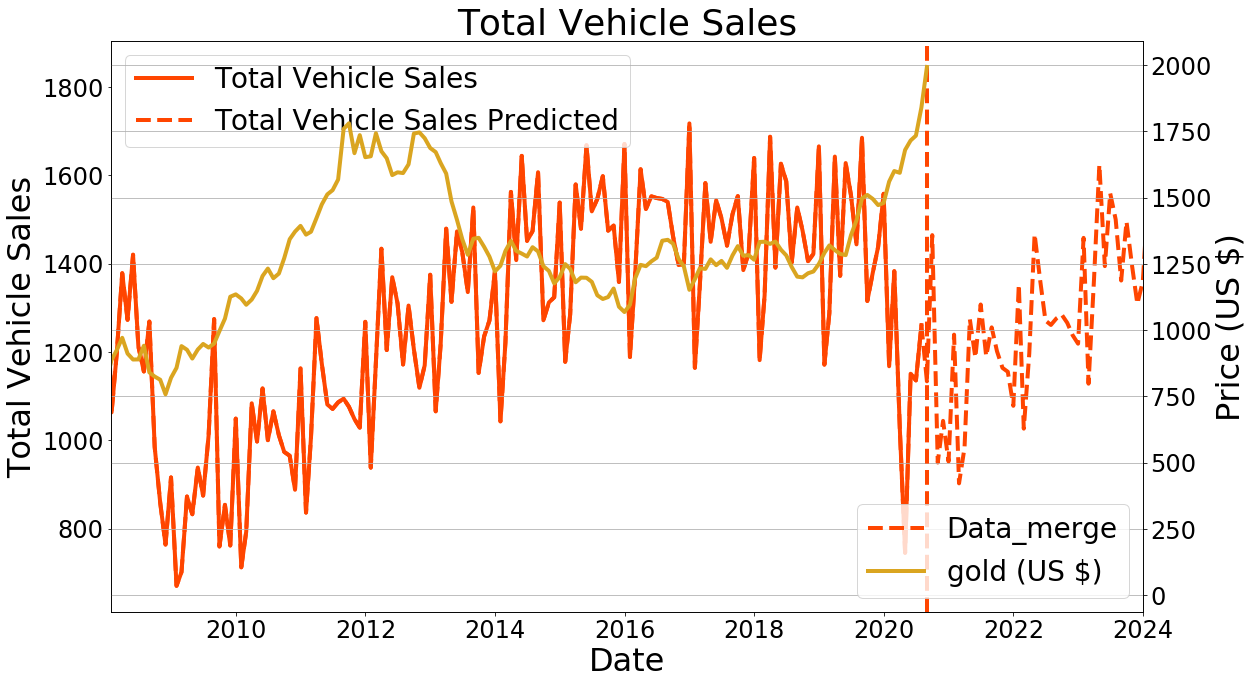

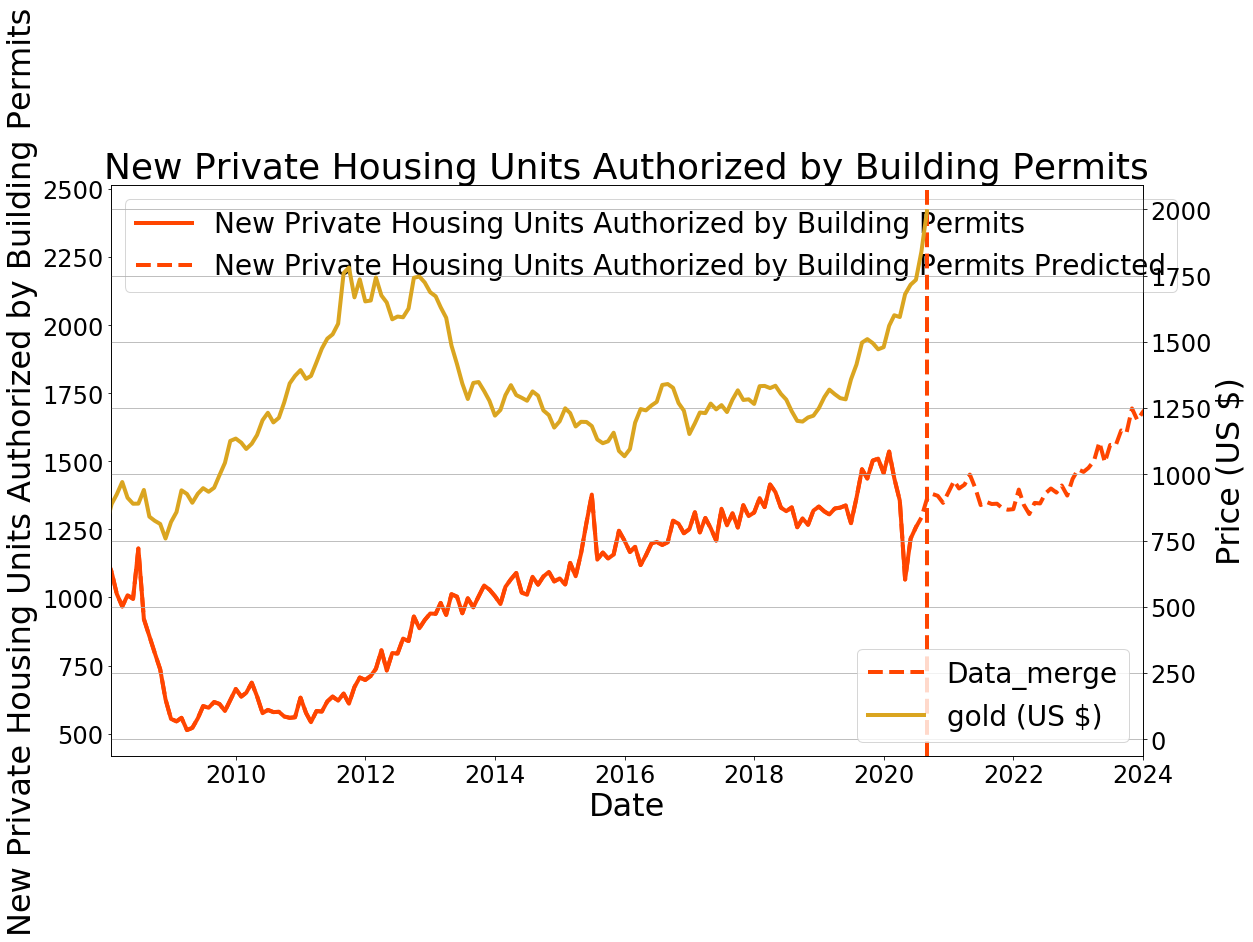

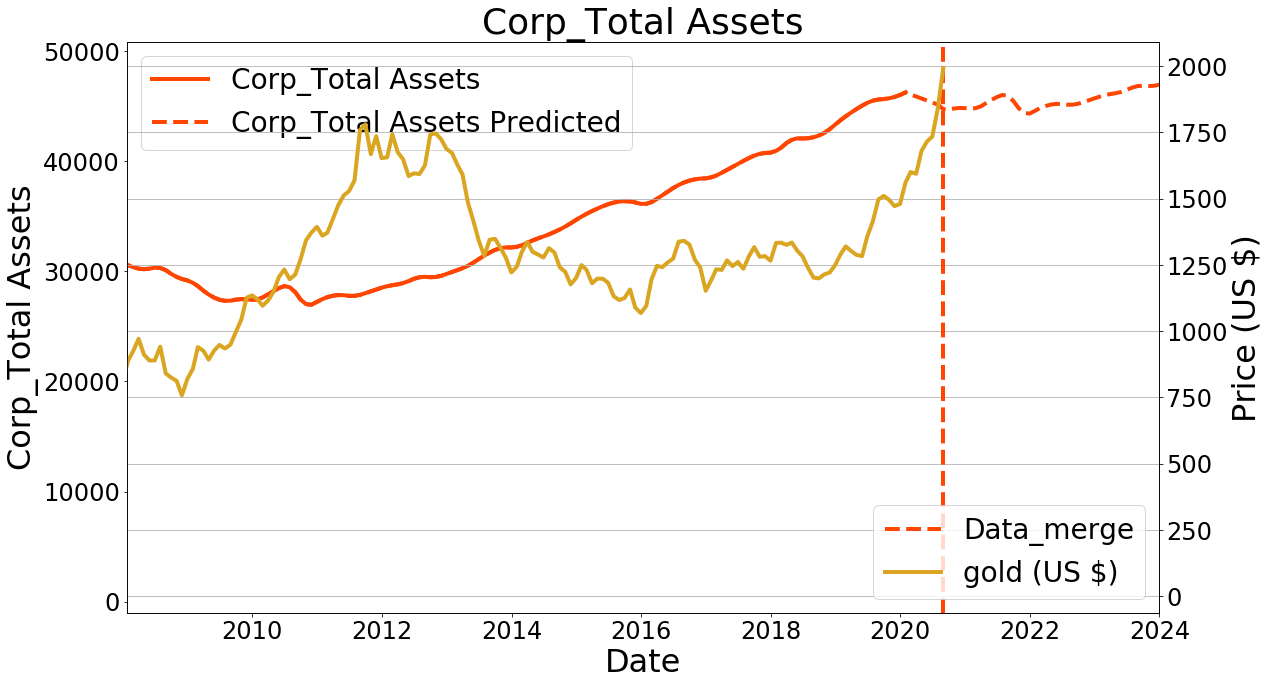

In [22]:
# Plot each of the 'extrapolate_list' attributes. The estimates look good and represent a 'best' case.
for i in leading_list[1:]:
    # Visualising the Linear Regression results.
    fig, ax1 = plt.subplots()
    j = i
    #k = 'Industrial Production_Manufacturing (NAICS)1'
    ax2 = ax1.twinx()
    ax1.plot(gold_df.index, gold_df[j], label=i, c='orangered', linewidth=4)
    ax1.plot(gold_df_fit.index, gold_df_fit[j], label=i + ' Predicted', c='orangered', linestyle='dashed', linewidth=4)
    #ax2.axvline(x=dt.date(2009, 6, 1), linestyle='--', color='dodgerblue', label='Data_merge', linewidth=4)
    ax2.axvline(x=dt.date(2020, 8, 31), linestyle='--', color='orangered', label='Data_merge', linewidth=4)


    ax2.plot(gold_df_fit.index, gold_df_fit[gold_col], label='gold (US $)', c='goldenrod', linewidth=4)
    #ax2.plot(gold_df.index, gold_df['GOLD_shift'], label='gold shifted (US $)', c='gold')

    #ax1.ylim(0, 15)
    plt.title(j)
    plt.xlabel('Date')
    plt.grid()
    ax1.legend(loc=2)
    ax2.legend(loc=4)
    fig.set_size_inches(18.5, 10.5)

    #years = mdates.YearLocator()   # every year
    #ax1.xaxis.set_major_locator(years)
    #years_fmt = mdates.DateFormatter('%Y')
    #months = mdates.MonthLocator()  # every month
    #ax1.xaxis.set_major_formatter(years_fmt)
    #ax1.xaxis.set_minor_locator(months)

    ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2024, 1, 1)])
    ax1.set_xlabel('Date')
    ax1.set_ylabel(j)
    ax2.set_ylabel('Price (US $)')
    #plt.savefig(i + 'Feature.jpeg', dpi=600)

In [23]:
data_path = os.path.join(os.getcwd(), "data")
# Check if the 'data' folder exists, if not create it
folder_create = os.path.exists(data_path)
if folder_create is False:
    os.mkdir(data_path)
    # Create 'train' and 'test' folders if the data folder does not exist.
    os.mkdir(os.path.join(data_path, "train"))
    os.mkdir(os.path.join(data_path, "test"))
# Export the polished dataframe to re-import after modelling.
gold_df_fit.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_fit.csv"))

In [24]:
# df_y is target to predict, in this case the price of gold
df_y = gold_df_fit[[gold_col]].copy()
# df_train contains the columns we will use to predict the price of gold
df_train = gold_df_fit.copy()
df_train.drop(columns=[gold_col], inplace=True)

In [25]:
# Instead of randomly splitting the data we will select a date to test 'blind' from
date_slice = '2020-07-31'

In [26]:
# Data split according to the date. 'train'=before date, 'test'=after.
X_train = df_train.loc[df_train.index < date_slice]
X_test = df_train.loc[df_train.index >= date_slice]
y_train = df_y.loc[df_y.index < date_slice]
y_test = df_y.loc[df_y.index >= date_slice]

In [27]:
# Export these four dataframes for later.
X_train.to_csv(os.path.join(data_path, "train", "train_x.csv"))
y_train.to_csv(os.path.join(data_path, "train", "train_y.csv"))
X_test.to_csv(os.path.join(data_path, "test", "test_x.csv"))
y_test.to_csv(os.path.join(data_path, "test", "test_y.csv"))

In [28]:
"""The following section is to generate the high and low cases"""

'The following section is to generate the high and low cases'

In [171]:
gold_df_low = gold_df_fit.copy()
gold_df_high = gold_df_fit.copy()

In [172]:
extrapolate_list = ['Industrial Production_Manufacturing (NAICS)', 'All Employees, Retail Trade', 'Households and Nonprofit Organizations_Total Assets', 'New Private Housing Units Authorized by Building Permits', 'Corp_Total Assets', 'Total Vehicle Sales']
for i in extrapolate_list:
    gold_df_low[i] = gold_df_low[i] + (gold_df_low[i].rolling(window=48).std())*2#.quantile(0.99, interpolation='midpoint')
    gold_df_high[i] = gold_df_high[i] - (gold_df_high[i].rolling(window=48).std())*2#.quantile(0.99, interpolation='midpoint')

In [173]:
gold_df_low['Unemployment_Rate'] = gold_df_low['Unemployment_Rate'] - (gold_df_low['Unemployment_Rate'].rolling(window=48).std())*1.0#.quantile(0.99, interpolation='midpoint')
gold_df_high['Unemployment_Rate'] = gold_df_high['Unemployment_Rate'] + (gold_df_high['Unemployment_Rate'].rolling(window=48).std())*1.0#.quantile(0.99, interpolation='midpoint')

In [174]:
linear_list = ['Federal Debt Held by Federal Reserve Banks', 'IndustrialProductionGoldSilver21222S', 'Fed Debt_Total Public Debt as Perc of GDP', 'FEDFUNDS']
for i in linear_list:
    gold_df_high.loc[gold_df_high.index > '2020-09-30', i] = np.nan
    gold_df_low.loc[gold_df_low.index > '2020-09-30', i] = np.nan

In [175]:
# Fit the end point value for the low df
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 4000
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('FEDFUNDS')] = 1
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('IndustrialProductionGoldSilver21222S')] = 125
#gold_df_low.iloc[-1, gold_df_low.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = 110

In [176]:
# Fit the end point value for the high df
gold_df_high.iloc[-1, gold_df_low.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 7500
gold_df_high.iloc[-1, gold_df_low.columns.get_loc('FEDFUNDS')] = -2
gold_df_high.iloc[-1, gold_df_low.columns.get_loc('IndustrialProductionGoldSilver21222S')] = 80
#gold_df_high.iloc[-1, gold_df_low.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = 180
#gold_df_high.tail()

In [177]:
itf = []
for i in list(range(1, 52, 1)):
    itf.append((0.00001*i**4) - (0.0017*(i**3)) + (0.0486*i**2) - (0.6076*i) + (180.69))
for i, j in zip(list(range(-1, -51, -1)), itf):
    gold_df_high.iloc[i, gold_df_high.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = j
itf = []
for i in list(range(1, 52, 1)):
    itf.append((-0.00002*i**4) + (0.0016*(i**3)) - (0.0383*i**2) + (0.3816*i) + (124.66))
    #y = -2E-05x4 + 0.0016x3 - 0.0383x2 + 0.3816x + 124.66
for i, j in zip(list(range(-1, -51, -1)), itf):
    gold_df_low.iloc[i, gold_df_low.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = j

In [178]:
for i in linear_list:
    gold_df_high[i] = gold_df_high[i].interpolate(method='linear', limit_direction='both')
    gold_df_low[i] = gold_df_low[i].interpolate(method='linear', limit_direction='both')

In [179]:
gold_df1_low1 = gold_df_low.loc[gold_df_low.index > '2020-08-31']
gold_df_high1 = gold_df_high.loc[gold_df_low.index > '2020-08-31']
gold_df_low = gold_df_fit.loc[gold_df_fit.index < '2020-08-31']
gold_df_high = gold_df_fit.loc[gold_df_fit.index < '2020-08-31']
gold_df_low = gold_df_low.append(gold_df1_low1)
gold_df_high = gold_df_high.append(gold_df_high1)

In [180]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 28,
         'axes.labelsize': 32,
         'axes.titlesize': 36,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}
plt.rcParams.update(params)

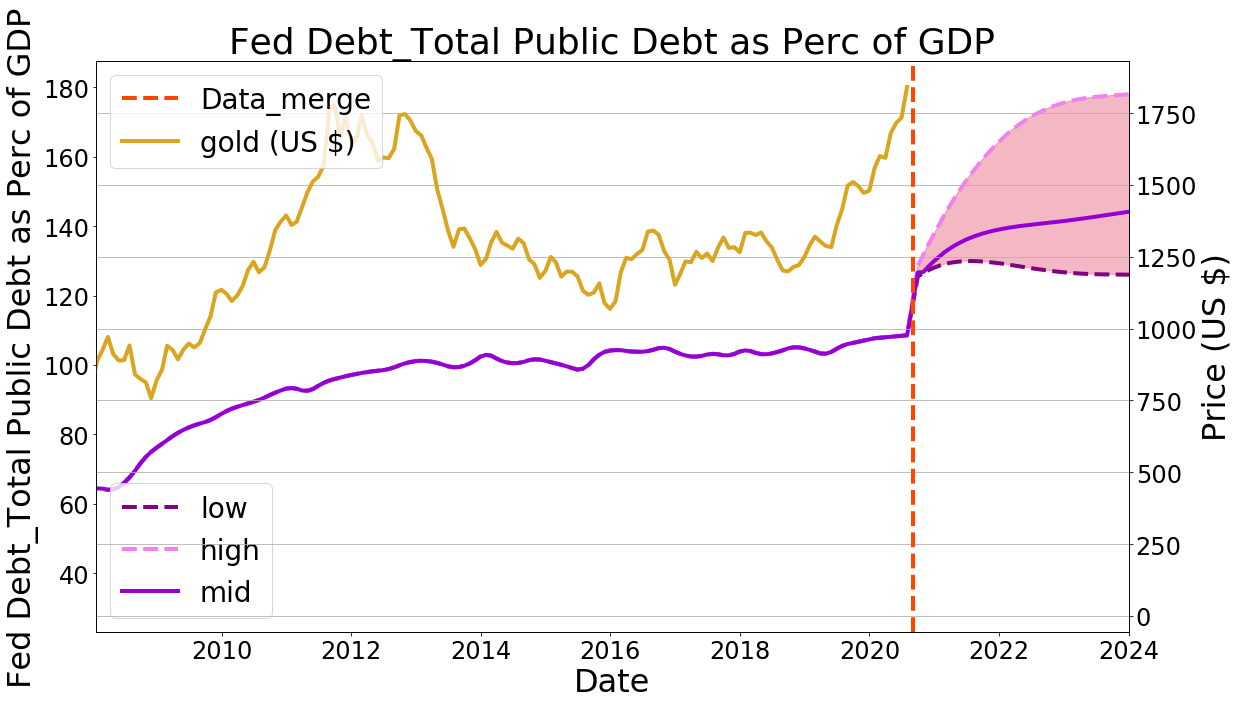

In [191]:
for i in leading_list[7:8]:
    # Visualising the Linear Regression results.
    fig, ax1 = plt.subplots()
    j = i
    #k = 'Industrial Production_Manufacturing (NAICS)1'
    ax2 = ax1.twinx()
    
    ax1.plot(gold_df_low.index, gold_df_low[j], label='low', c='purple', linewidth=4, linestyle='dashed')
    ax1.plot(gold_df_high.index, gold_df_high[j], label='high', c='violet', linewidth=4, linestyle='dashed')
    ax1.plot(gold_df_fit.index, gold_df_fit[j], label='mid', c='darkviolet', linewidth=4)

    ax2.axvline(x=dt.date(2020, 8, 31), linestyle='--', color='orangered', label='Data_merge', linewidth=4)
    ax1.fill_between(gold_df_high.index, gold_df_low[j],  gold_df_high[j], alpha=0.3, color='crimson')


    ax2.plot(gold_df_low.index, gold_df_low[gold_col], label='gold (US $)', c='goldenrod', linewidth=4)


    plt.title(j)
    plt.xlabel('Date')
    plt.grid()
    ax1.legend(loc=3)
    ax2.legend(loc=2)
    fig.set_size_inches(18.5, 10.5)

    ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2024, 1, 1)])
    ax1.set_xlabel('Date')
    ax1.set_ylabel(j)
    ax2.set_ylabel('Price (US $)')
    plt.savefig(i + ' HML.jpeg', dpi=600)

In [182]:
# Export the polished dataframe to re-import after modelling.
gold_df_low.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_low.csv"))
# Export the polished dataframe to re-import after modelling.
gold_df_high.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_high.csv"))

In [183]:
# df_train contains the columns we will use to predict the price of gold
df_train_low = gold_df_low.copy()
df_train_low.drop(columns=[gold_col], inplace=True)
# df_train contains the columns we will use to predict the price of gold
df_train_high = gold_df_high.copy()
df_train_high.drop(columns=[gold_col], inplace=True)

In [184]:
# Instead of randomly splitting the data we will select a date to test 'blind' from
date_slice = '2020-07-31'
df_train_high = df_train_high.loc[df_train_high.index >= date_slice]
df_train_low = df_train_low.loc[df_train_low.index >= date_slice]
df_train_high.to_csv(os.path.join(data_path, "test", "df_train_high.csv"))
df_train_low.to_csv(os.path.join(data_path, "test", "df_train_low.csv"))